# Circinus Data

In [12]:
import numpy as np                      
import pylab                           
import matplotlib                     
import matplotlib.gridspec as gridspec  
import scipy
import astropy.io.fits as fits  
import latex
from astropy.wcs import WCS     
import astropy.units as u
import matplotlib.pyplot as plt
import pyspeckit as psk     
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.utils import data
data.conf.remote_timeout = 60
from spectral_cube import SpectralCube
%matplotlib inline                             
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='sans-serif')
from reproject import reproject_interp 
from reproject.mosaicking import find_optimal_celestial_wcs 

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## (2) IMAGE B: Circinus_spw0_contsub.image.pbcor.fits

Text(0.01, 0.9, 'Spectrum at position (490,500)')

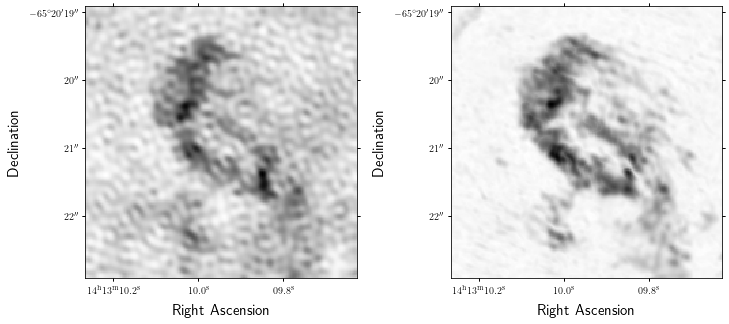

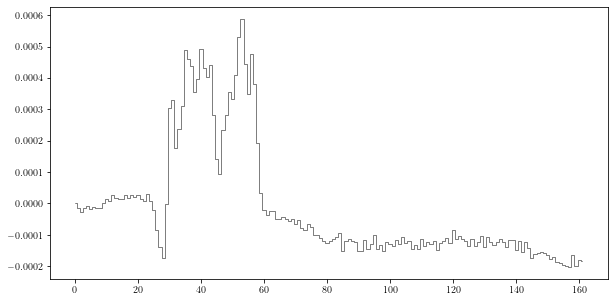

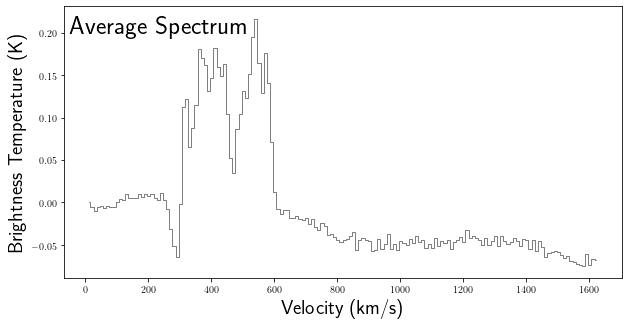

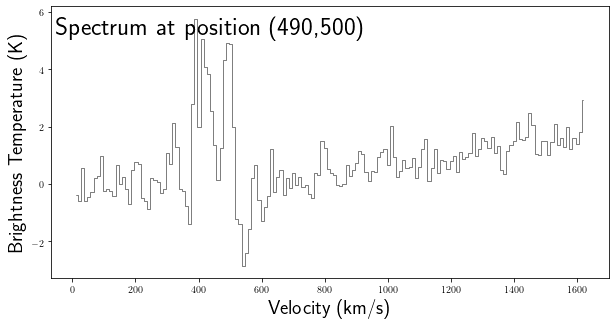

In [6]:
pathB = 'Circinus_spw0_contsub.image.pbcor.fits'   
cubeB = np.squeeze(fits.getdata(pathB))
cheaderB = fits.getheader(pathB)  
#print(cheaderB)

wB = WCS(pathB)
wB = wB.dropaxis(3)
wB = wB.dropaxis(2)

mom_0_B = np.nansum(cubeB[20:60],axis=0) 
maxvalB = np.nanmax(cubeB,axis=0)

center_x1 = 490
center_y1 = 500

cut_mom_0_B = Cutout2D(mom_0_B, (center_y1,center_x1), (200, 200), wcs=wB)
cut_max_B = Cutout2D(maxvalB, (center_y1,center_x1), (200, 200), wcs=wB)


figB1 = pylab.figure(2,figsize=(12,5))
axB1 = pylab.subplot(1,2,1,projection=cut_mom_0_B.wcs)
imB1 = pylab.imshow(cut_mom_0_B.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)
#pylab.savefig("Circinus_Galaxy_Image_B1.pdf")

axB2 = pylab.subplot(1,2,2, projection=cut_max_B.wcs)
imB2 = pylab.imshow(cut_max_B.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

peak_x,peak_y = pylab.where(mom_0_B==np.max(mom_0_B)) 
#print(peak_x,peak_y)

threshold = pylab.where(mom_0_B<=0.9*np.max(mom_0_B))
#print(threshold)
  
total_spectrum = np.nanmean(cubeB,axis=(1,2))

figB2 = pylab.figure(3,figsize=(10,5))
axB3=pylab.subplot()
axB3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.savefig("Circinus_Galaxy_Image_B2.pdf")

size = cheaderB["NAXIS3"] 
rest= cheaderB["RESTFRQ"] / 1.0e9
f0 = cheaderB["CRVAL3"] / 1.0e9 
df = cheaderB["CDELT3"] / 1.0e9 
v0_kms = cheaderB["ALTRVAL"] / 1000.0 
dv_kms = df / rest * 2.998e5 * -1 
pix = cheaderB["CRPIX3"]

coords=(490,500)

x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

bmaj = cheaderB["BMAJ"] * 3600
bmin = cheaderB["BMIN"] * 3600
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)

figB3 = matplotlib.pyplot.figure(4,figsize=(10,5))
axB3=matplotlib.pyplot.subplot() 
axB3.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_B3.pdf")

figB4 = matplotlib.pyplot.figure(5,figsize=(10,5))
axB4=matplotlib.pyplot.subplot() 
axB4.plot(x_vel,cubeB[:,coords[0],coords[1]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_B4.pdf")

## (3) IMAGE C: Circinus_spw0.image.pbcor.fits

Text(0.01, 0.9, 'Spectrum at position (490,500)')

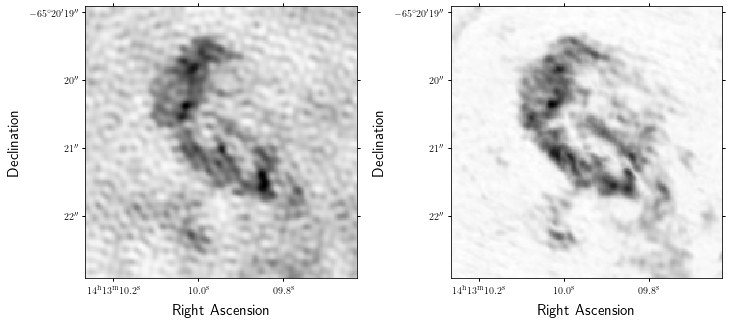

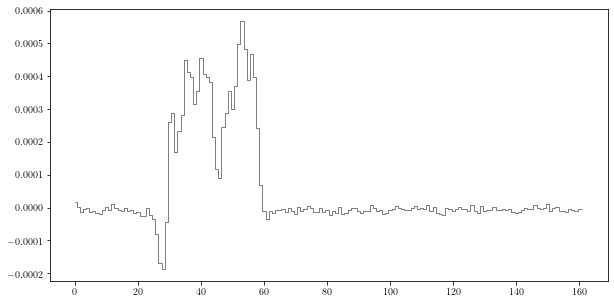

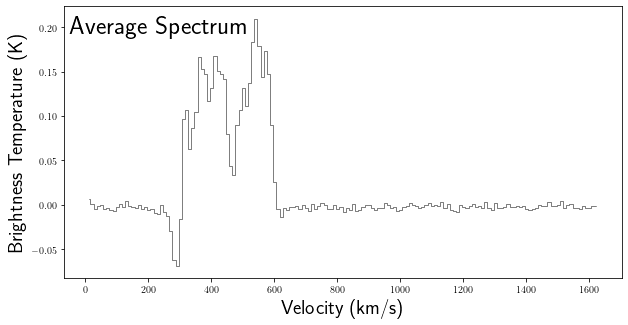

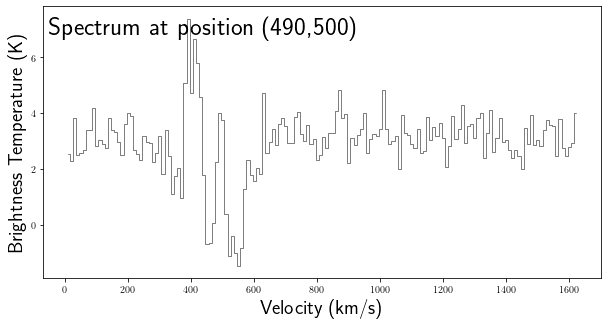

In [45]:
pathC = 'Circinus_spw0.image.pbcor.fits'   
cubeC = np.squeeze(fits.getdata(pathC))
cheaderC = fits.getheader(pathC)  
#print(cheaderC)

wC = WCS(pathC)
wC = wC.dropaxis(3)
wC = wC.dropaxis(2)

mom_0_C = np.nansum(cubeC[20:60],axis=0) 
maxvalC = np.nanmax(cubeC,axis=0)

center_xC = 490
center_yC = 500

cut_mom_0_C = Cutout2D(mom_0_C, (center_yC,center_xC), (200, 200), wcs=wC)
cut_max_C = Cutout2D(maxvalC, (center_yC,center_xC), (200, 200), wcs=wC)

figC1 = pylab.figure(2,figsize=(12,5))
axC1 = pylab.subplot(1,2,1,projection=cut_mom_0_C.wcs)
imgC1 = pylab.imshow(cut_mom_0_C.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)
#pylab.savefig("Circinus_Galaxy_Image_C1.pdf")

axC2 = pylab.subplot(1,2,2, projection=cut_max_C.wcs)
imgC2 = pylab.imshow(cut_max_C.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

peak_x,peak_y = pylab.where(mom_0_C==np.max(mom_0_C)) 
#print(peak_x,peak_y)

threshold = pylab.where(mom_0_C<=0.9*np.max(mom_0_C))
#print(threshold)
  
total_spectrum = np.nanmean(cubeC,axis=(1,2))

figC3 = pylab.figure(3,figsize=(10,5))
axC3=pylab.subplot()
axC3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.savefig("Circinus_Galaxy_Image_C2.pdf")

size = cheaderC["NAXIS3"] 
rest= cheaderC["RESTFRQ"] / 1.0e9
f0 = cheaderC["CRVAL3"] / 1.0e9 
df = cheaderC["CDELT3"] / 1.0e9 
v0_kms = cheaderC["ALTRVAL"] / 1000.0 
dv_kms = df / rest * 2.998e5 * -1 
pix = cheaderC["CRPIX3"]

coords=(490,500)

x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

bmaj = cheaderC["BMAJ"] * 3600
bmin = cheaderC["BMIN"] * 3600
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)

figC4 = matplotlib.pyplot.figure(4,figsize=(10,5))
axC4=matplotlib.pyplot.subplot() 
axC4.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_C3.pdf")

figC5 = matplotlib.pyplot.figure(5,figsize=(10,5))
axC5=matplotlib.pyplot.subplot() 
axC5.plot(x_vel,cubeC[:,coords[0],coords[1]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_C4.pdf")

## (4) IMAGE D: Circinus_spw1_contsub.image.pbcor.fits

Text(0.01, 0.9, 'Spectrum at position (490,500)')

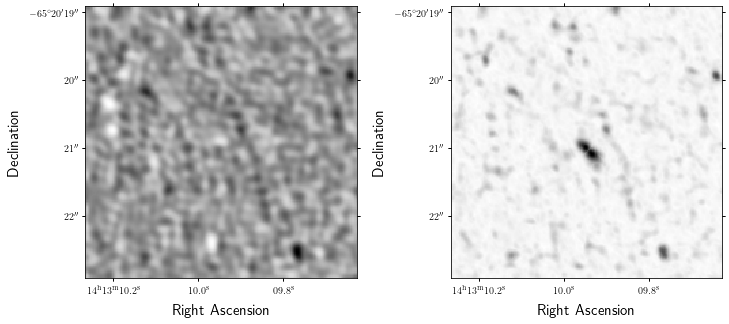

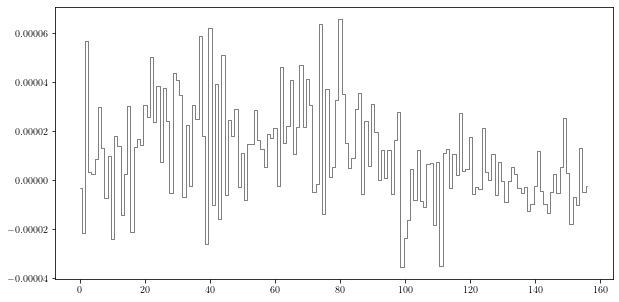

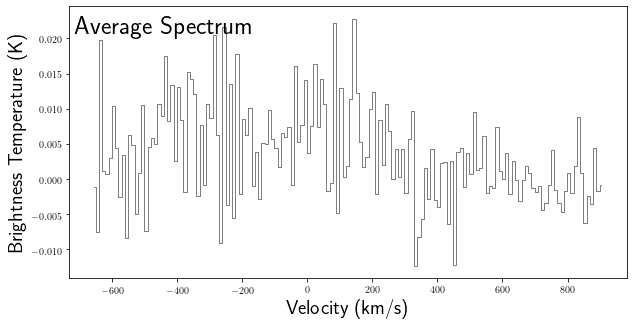

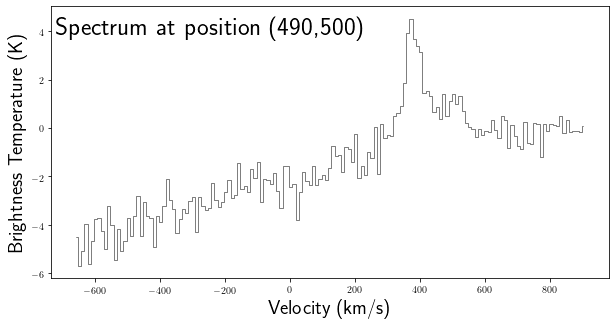

In [11]:
pathD = 'Circinus_spw2_contsub.image.pbcor.fits'   
cubeD = np.squeeze(fits.getdata(pathD))
cheaderD = fits.getheader(pathD) 
#print(cheaderD)

wD = WCS(pathD)
wD = wD.dropaxis(3)
wD = wD.dropaxis(2)

mom_0_D = np.nansum(cubeD,axis=0) 
maxvalD = np.nanmax(cubeD,axis=0)

center_x2 = 490
center_y2 = 500

cut_mom_0_D = Cutout2D(mom_0_D, (center_y2,center_x2), (200, 200), wcs=wD)
cut_max_D = Cutout2D(maxvalD, (center_y2,center_x2), (200, 200), wcs=wD)


figD1 = pylab.figure(2,figsize=(12,5))
axD1 = pylab.subplot(1,2,1,projection=cut_mom_0_D.wcs)
imgD1 = pylab.imshow(cut_mom_0_D.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)
#pylab.savefig("Circinus_Galaxy_Image_D1.pdf")

axD2 = pylab.subplot(1,2,2, projection=cut_max_D.wcs)
imgD2 = pylab.imshow(cut_max_D.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

peak_x,peak_y = pylab.where(mom_0_D==np.max(mom_0_D)) 
#print(peak_x,peak_y)

threshold = pylab.where(mom_0_D<=0.9*np.max(mom_0_D))
#print(threshold)
  
total_spectrum = np.nanmean(cubeD,axis=(1,2))

figD3 = pylab.figure(3,figsize=(10,5))
axD3=pylab.subplot()
axD3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.savefig("Circinus_Galaxy_Image_D2.pdf")

size = cheaderD["NAXIS3"] 
rest= cheaderD["RESTFRQ"] / 1.0e9
f0 = cheaderD["CRVAL3"] / 1.0e9 
df = cheaderD["CDELT3"] / 1.0e9 
v0_kms = cheaderD["ALTRVAL"] / 1000.0 
dv_kms = df / rest * 2.998e5 * -1 
pix = cheaderD["CRPIX3"]

coords=(490,500)

x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

bmaj = cheaderB["BMAJ"] * 3600
bmin = cheaderB["BMIN"] * 3600
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)

figD4 = matplotlib.pyplot.figure(4,figsize=(10,5))
axD4=matplotlib.pyplot.subplot() 
axD4.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_D3.pdf")

figD5 = matplotlib.pyplot.figure(5,figsize=(10,5))
axD5=matplotlib.pyplot.subplot() 
axD5.plot(x_vel,cubeD[:,coords[0],coords[1]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_D4.pdf")

## (5) IMAGE E: Circinus_spw1.image.pbcor.fits

Text(0.01, 0.9, 'Spectrum at position (490,500)')

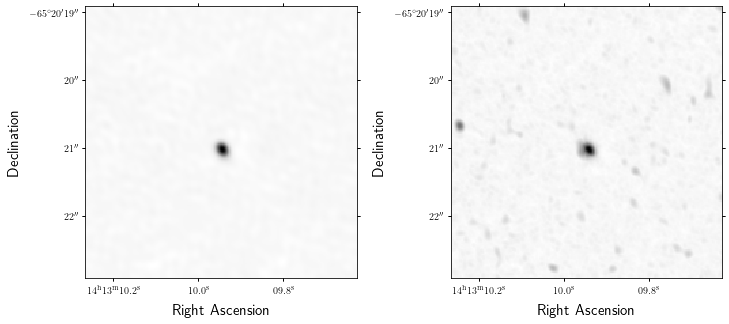

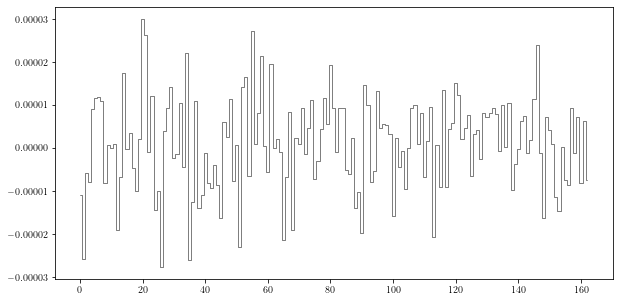

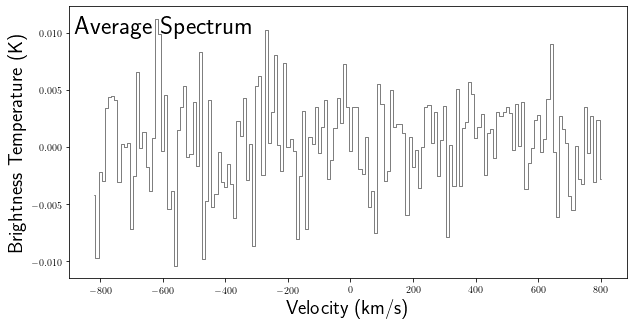

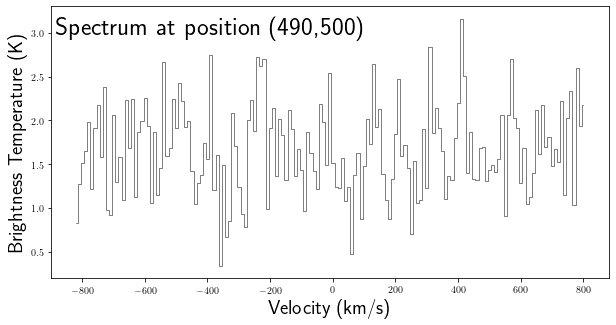

In [12]:
# Center at 500,485

pathE = 'Circinus_spw1.image.pbcor.fits'   
cubeE = np.squeeze(fits.getdata(pathE))
cheaderE = fits.getheader(pathE)  
#print(cheaderE)

wE = WCS(pathE)
wE = wE.dropaxis(3)
wE = wE.dropaxis(2)

mom_0_E = np.nansum(cubeE,axis=0) 
maxvalE = np.nanmax(cubeE,axis=0)

center_xE = 490
center_yE = 500

cut_mom_0_E = Cutout2D(mom_0_E, (center_yE,center_xE), (200, 200), wcs=wE)
cut_max_E = Cutout2D(maxvalE, (center_yE,center_xE), (200, 200), wcs=wE)


figE1 = pylab.figure(2,figsize=(12,5))
axE1 = pylab.subplot(1,2,1,projection=cut_mom_0_E.wcs)
imgE1 = pylab.imshow(cut_mom_0_E.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)
#pylab.savefig("Circinus_Galaxy_Image_E1.pdf")

axE2 = pylab.subplot(1,2,2, projection=cut_max_E.wcs)
imgE2 = pylab.imshow(cut_max_E.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

peak_x,peak_y = pylab.where(mom_0_E==np.max(mom_0_E)) 
#print(peak_x,peak_y)

threshold = pylab.where(mom_0_E<=0.9*np.max(mom_0_E))
#print(threshold)
  
total_spectrum = np.nanmean(cubeE,axis=(1,2))

figE3 = pylab.figure(3,figsize=(10,5))
axE3=pylab.subplot()
axE3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.savefig("Circinus_Galaxy_Image_D2.pdf")

size = cheaderE["NAXIS3"] 
rest= cheaderE["RESTFRQ"] / 1.0e9
f0 = cheaderE["CRVAL3"] / 1.0e9 
df = cheaderE["CDELT3"] / 1.0e9 
v0_kms = cheaderE["ALTRVAL"] / 1000.0 
dv_kms = df / rest * 2.998e5 * -1 
pix = cheaderE["CRPIX3"]

coords=(490,500)

x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

bmaj = cheaderB["BMAJ"] * 3600
bmin = cheaderB["BMIN"] * 3600
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)

figE4 = matplotlib.pyplot.figure(4,figsize=(10,5))
axE4=matplotlib.pyplot.subplot() 
axE4.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_D3.pdf")

figE5 = matplotlib.pyplot.figure(5,figsize=(10,5))
axE5=matplotlib.pyplot.subplot() 
axE5.plot(x_vel,cubeE[:,coords[0],coords[1]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_E4.pdf")

## (6) IMAGE F: Circinus_spw2_contsub.image.pbcor.fits

Text(0.01, 0.9, 'Spectrum at position (490,500)')

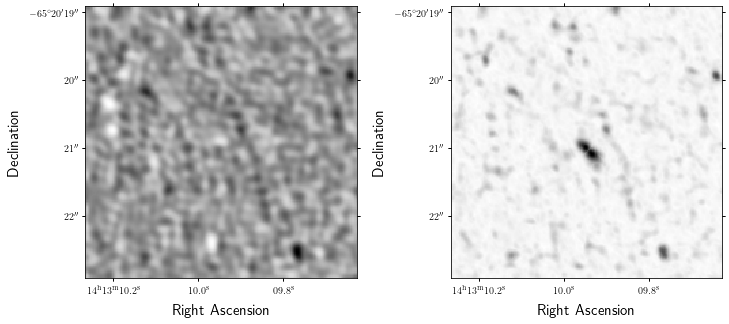

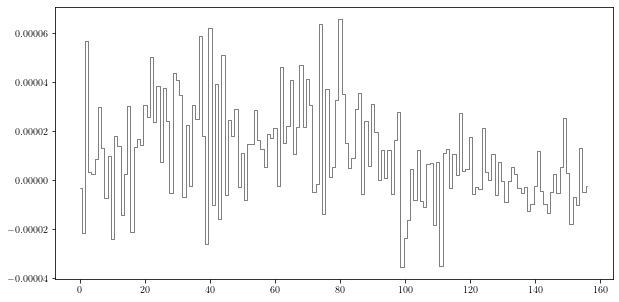

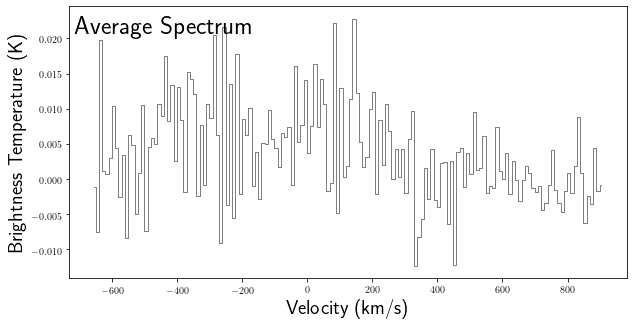

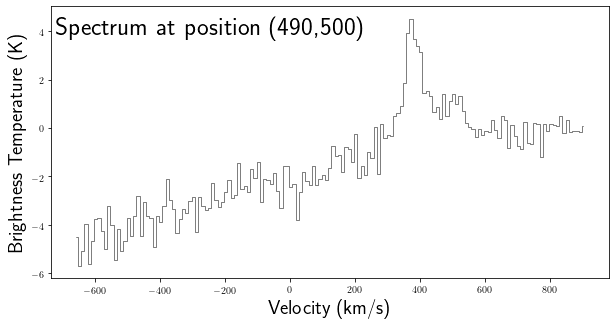

In [13]:
# Center 500 485
# Not comfortable with the moment zero and max locations here.

pathF = 'Circinus_spw2_contsub.image.pbcor.fits'   
cubeF = np.squeeze(fits.getdata(pathF))
cheaderF = fits.getheader(pathF)  
#print(cheaderF)

wF = WCS(pathF)
wF = wF.dropaxis(3)
wF = wF.dropaxis(2)

mom_0_F = np.nansum(cubeF,axis=0) 
maxvalF = np.nanmax(cubeF,axis=0)

center_x3 = 490
center_y3 = 500

cut_mom_0_F = Cutout2D(mom_0_F, (center_y3,center_x3), (200, 200), wcs=wF)
cut_max_F = Cutout2D(maxvalF, (center_y3,center_x3), (200, 200), wcs=wF)

figF1 = pylab.figure(2,figsize=(12,5))
axF1 = pylab.subplot(1,2,1,projection=cut_mom_0_F.wcs)
imgF1 = pylab.imshow(cut_mom_0_F.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)
#pylab.savefig("Circinus_Galaxy_Image_F1.pdf")

axF2 = pylab.subplot(1,2,2, projection=cut_max_F.wcs)
imgF2 = pylab.imshow(cut_max_F.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

peak_x,peak_y = pylab.where(mom_0_F==np.max(mom_0_F)) 
#print(peak_x,peak_y)

threshold = pylab.where(mom_0_F<=0.9*np.max(mom_0_F))
#print(threshold)
  
total_spectrum = np.nanmean(cubeF,axis=(1,2))

figF3 = pylab.figure(3,figsize=(10,5))
axF3=pylab.subplot()
axF3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.savefig("Circinus_Galaxy_Image_F2.pdf")

size = cheaderF["NAXIS3"] 
rest= cheaderF["RESTFRQ"] / 1.0e9
f0 = cheaderF["CRVAL3"] / 1.0e9 
df = cheaderF["CDELT3"] / 1.0e9 
v0_kms = cheaderF["ALTRVAL"] / 1000.0 
dv_kms = df / rest * 2.998e5 * -1 
pix = cheaderF["CRPIX3"]

coords=(490,500)

x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

bmaj = cheaderB["BMAJ"] * 3600
bmin = cheaderB["BMIN"] * 3600
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)

figF4 = matplotlib.pyplot.figure(4,figsize=(10,5))
axF4=matplotlib.pyplot.subplot() 
axF4.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_F3.pdf")

figF5 = matplotlib.pyplot.figure(5,figsize=(10,5))
axF5=matplotlib.pyplot.subplot() 
axF5.plot(x_vel,cubeF[:,coords[0],coords[1]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_F4.pdf")

## (7) IMAGE G: Circinus_spw3_contsub.image.pbcor.fits

Text(0.01, 0.9, 'Spectrum at position (490,500)')

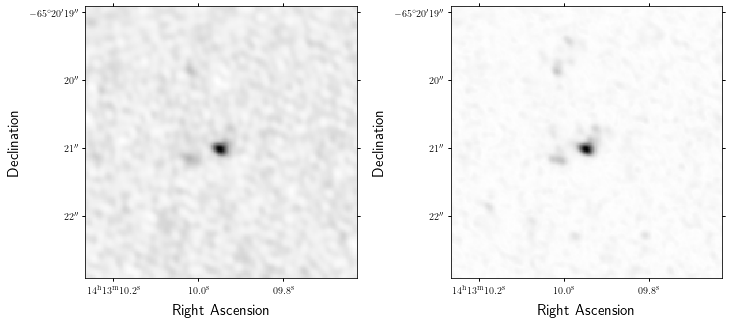

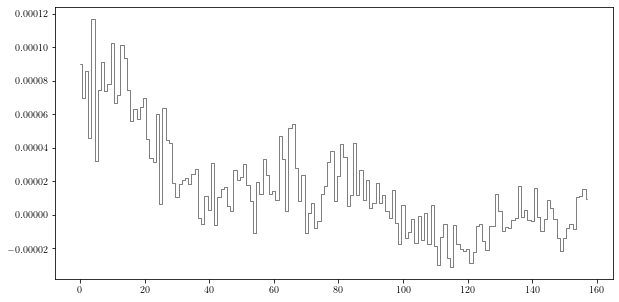

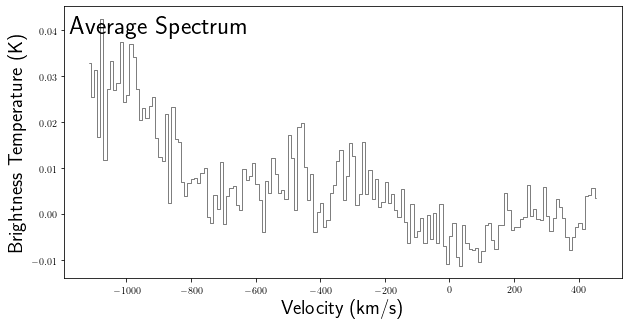

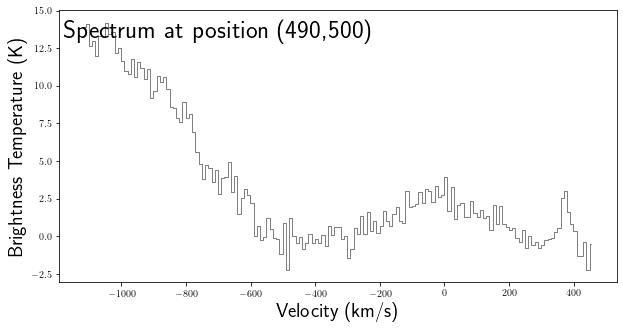

In [14]:
# Center 500,485

pathG = 'Circinus_spw3_contsub.image.pbcor.fits'   
cubeG = np.squeeze(fits.getdata(pathG))
cheaderG = fits.getheader(pathG)  
#print(cheaderG)

wG = WCS(pathG)
wG = wG.dropaxis(3)
wG = wG.dropaxis(2)

mom_0_G = np.nansum(cubeG,axis=0) 
maxvalG = np.nanmax(cubeG,axis=0)

center_x4 = 490
center_y4 = 500

cut_mom_0_G = Cutout2D(mom_0_G, (center_y4,center_x4), (200, 200), wcs=wG)
cut_max_G = Cutout2D(maxvalG, (center_y4,center_x4), (200, 200), wcs=wG)

figG1 = pylab.figure(2,figsize=(12,5))
axG1 = pylab.subplot(1,2,1,projection=cut_mom_0_G.wcs)
imgG1 = pylab.imshow(cut_mom_0_G.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

#pylab.savefig("Circinus_Galaxy_Image_G1.pdf")

axG2 = pylab.subplot(1,2,2, projection=cut_max_G.wcs)
imgG2 = pylab.imshow(cut_max_G.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

peak_x,peak_y = pylab.where(mom_0_G==np.max(mom_0_G)) 
#print(peak_x,peak_y)

threshold = pylab.where(mom_0_G<=0.9*np.max(mom_0_G))
#print(threshold)
  
total_spectrum = np.nanmean(cubeG,axis=(1,2))

figG3 = pylab.figure(3,figsize=(10,5))
axG3=pylab.subplot()
axG3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.savefig("Circinus_Galaxy_Image_D2.pdf")

size = cheaderG["NAXIS3"] 
rest= cheaderG["RESTFRQ"] / 1.0e9
f0 = cheaderG["CRVAL3"] / 1.0e9 
df = cheaderG["CDELT3"] / 1.0e9 
v0_kms = cheaderG["ALTRVAL"] / 1000.0 
dv_kms = df / rest * 2.998e5 * -1 
pix = cheaderG["CRPIX3"]

coords=(490,500)

x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

bmaj = cheaderG["BMAJ"] * 3600
bmin = cheaderG["BMIN"] * 3600
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)

figG4 = matplotlib.pyplot.figure(4,figsize=(10,5))
axG4=matplotlib.pyplot.subplot() 
axG4.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_G3.pdf")

figG5 = matplotlib.pyplot.figure(5,figsize=(10,5))
axG5=matplotlib.pyplot.subplot() 
axG5.plot(x_vel,cubeG[:,coords[0],coords[1]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_G4.pdf")

## (8) IMAGE H: Circinus_spw3.image.pbcor.fits

Text(0.01, 0.9, 'Spectrum at position (490,500)')

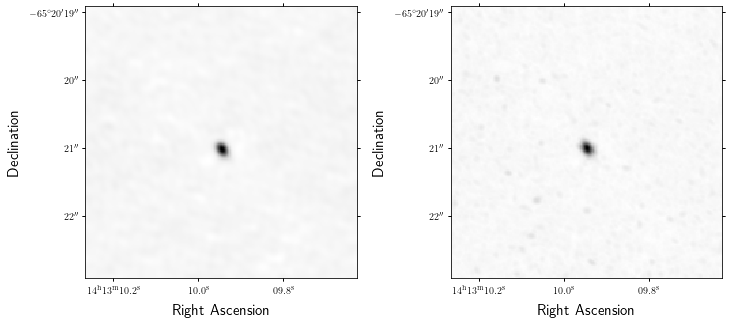

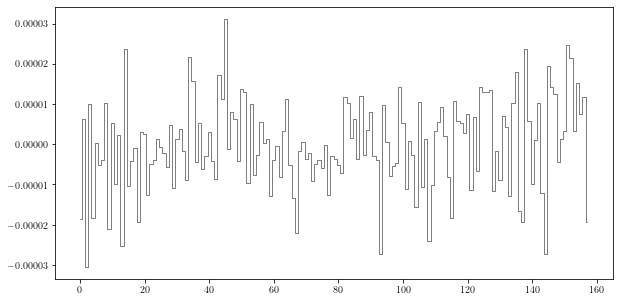

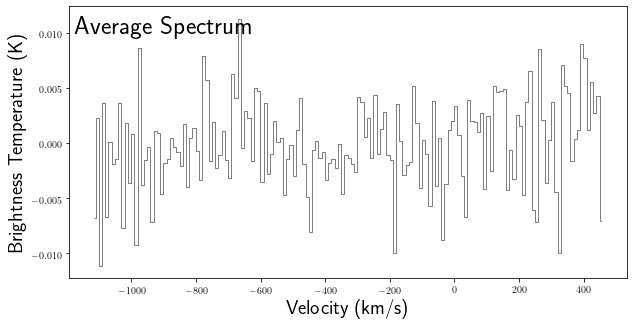

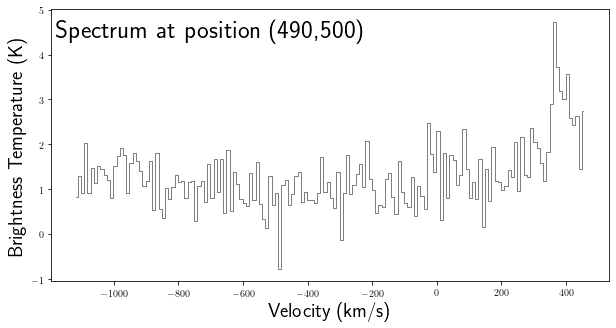

In [15]:
# Center 500,485

pathH = 'Circinus_spw3.image.pbcor.fits'   
cubeH = np.squeeze(fits.getdata(pathH))
cheaderH = fits.getheader(pathH)  
#print(cheaderH)

wH = WCS(pathH)
wH = wH.dropaxis(3)
wH = wH.dropaxis(2)

mom_0_H = np.nansum(cubeH,axis=0) 
maxvalH = np.nanmax(cubeH,axis=0)

center_xH = 490
center_yH = 500

cut_mom_0_H = Cutout2D(mom_0_H, (center_yH,center_xH), (200, 200), wcs=wH)
cut_max_H = Cutout2D(maxvalH, (center_yH,center_xH), (200, 200), wcs=wH)

figH1 = pylab.figure(2,figsize=(12,5))
axH1 = pylab.subplot(1,2,1,projection=cut_mom_0_H.wcs)
imgH1 = pylab.imshow(cut_mom_0_H.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)
#pylab.savefig("Circinus_Galaxy_Image_H1.pdf")

axH2 = pylab.subplot(1,2,2, projection=cut_max_H.wcs)
imgH2 = pylab.imshow(cut_max_H.data,cmap='Greys')
pylab.xlabel('Right Ascension',fontsize=15)
pylab.ylabel('Declination',fontsize=15)

peak_x,peak_y = pylab.where(mom_0_H==np.max(mom_0_H)) 
#print(peak_x,peak_y)

threshold = pylab.where(mom_0_H<=0.9*np.max(mom_0_H))
#print(threshold)
  
total_spectrum = np.nanmean(cubeH,axis=(1,2))

figH3 = pylab.figure(3,figsize=(10,5))
axH3=pylab.subplot()
axH3.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
#pylab.savefig("Circinus_Galaxy_Image_D2.pdf")

size = cheaderH["NAXIS3"] 
rest= cheaderH["RESTFRQ"] / 1.0e9
f0 = cheaderH["CRVAL3"] / 1.0e9 
df = cheaderH["CDELT3"] / 1.0e9 
v0_kms = cheaderH["ALTRVAL"] / 1000.0 
dv_kms = df / rest * 2.998e5 * -1 
pix = cheaderH["CRPIX3"]

coords=(490,500)

x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

bmaj = cheaderH["BMAJ"] * 3600
bmin = cheaderH["BMIN"] * 3600
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)

figH4 = matplotlib.pyplot.figure(4,figsize=(10,5))
axH4=matplotlib.pyplot.subplot() 
axH4.plot(x_vel,total_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Average Spectrum',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_H3.pdf")

figH5 = matplotlib.pyplot.figure(5,figsize=(10,5))
axH5=matplotlib.pyplot.subplot() 
axH5.plot(x_vel,cubeH[:,coords[0],coords[1]]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
matplotlib.pyplot.xlabel('Velocity (km/s)',fontsize=20)
matplotlib.pyplot.ylabel('Brightness Temperature (K)',fontsize=20)
matplotlib.pyplot.annotate(s='Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
#pylab.savefig("Circinus_Galaxy_Image_H4.pdf")

# Torus Spectra

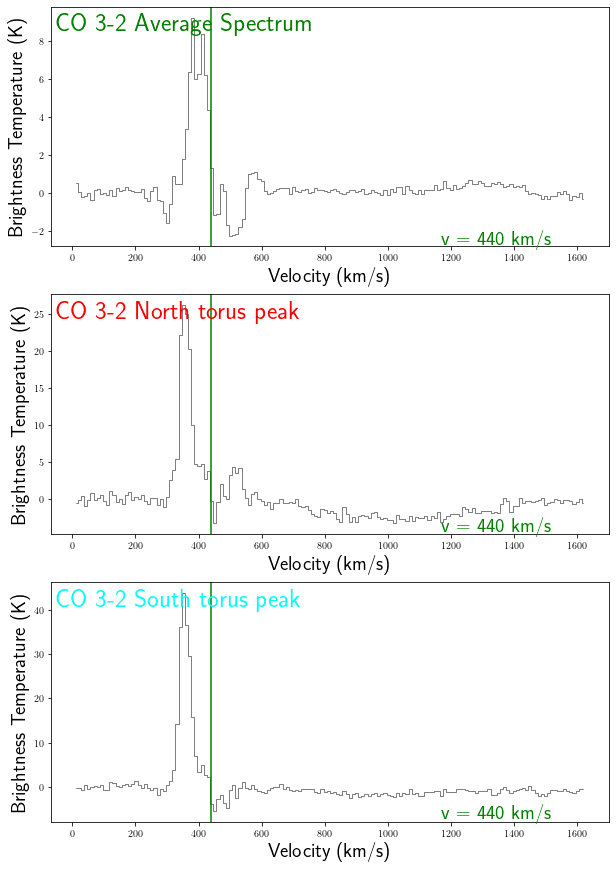

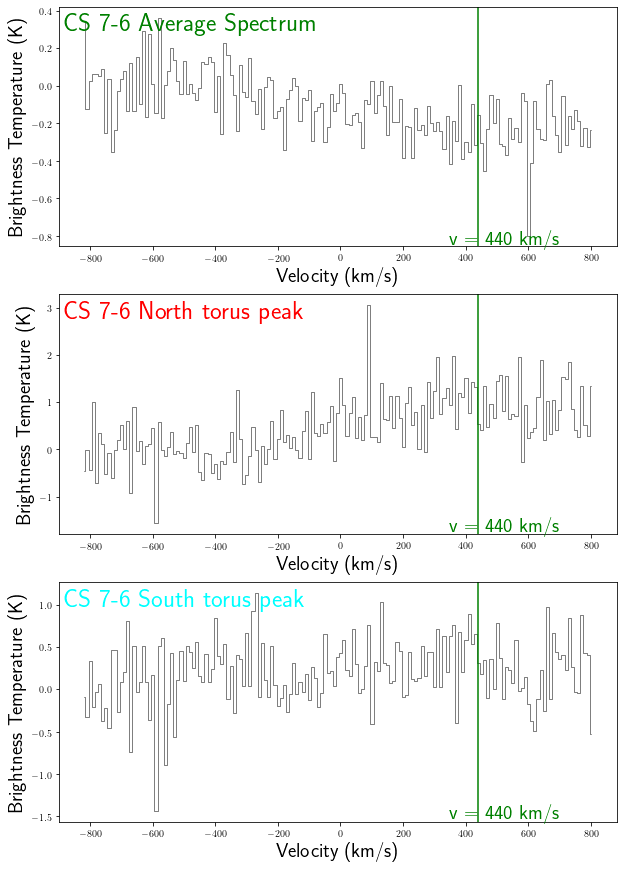

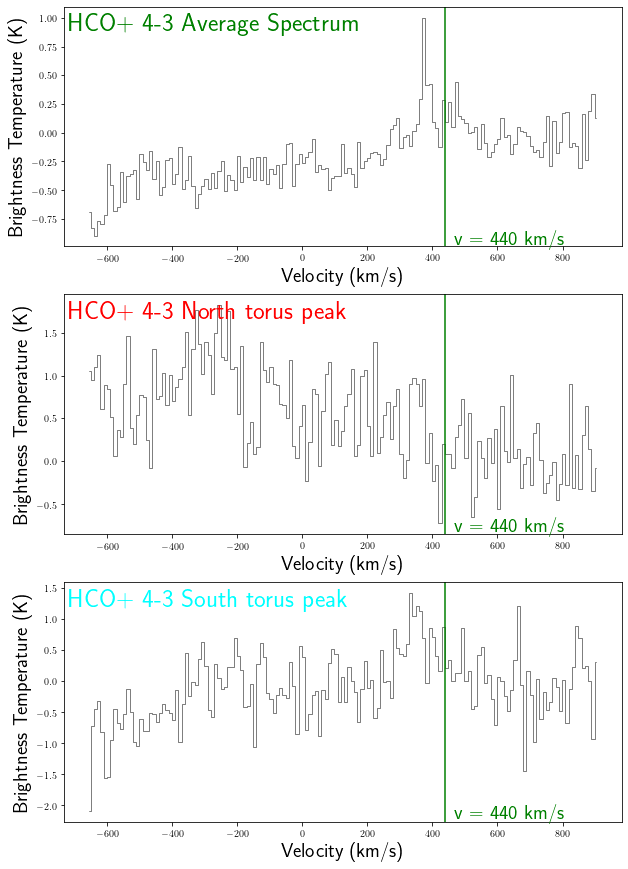

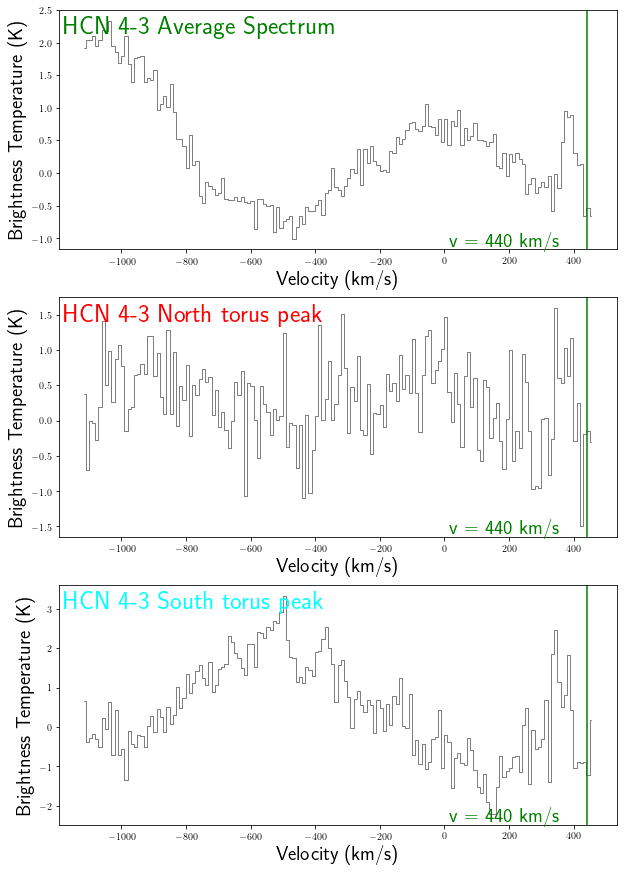

In [16]:
paths = pylab.array(['Circinus_spw0_contsub.image.pbcor.fits',\
                     'Circinus_spw1_contsub.image.pbcor.fits',\
                     'Circinus_spw2_contsub.image.pbcor.fits',\
                     'Circinus_spw3_contsub.image.pbcor.fits'])

mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])

center_x=490
center_y=500

for i, path in enumerate(paths):
    
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    w = WCS(path)
    w = w.dropaxis(3)
    w = w.dropaxis(2)
        
    maxval = np.nanmax(cube,axis=0)
    cut_max = Cutout2D(maxval, (center_x,center_y), (200, 200), wcs=w)
    
        
    if i==2:
        peak_y,peak_x = np.where(cut_max.data==np.nanmax(cut_max.data))
        x = (100-peak_x)+center_x
        y = (100-peak_y)+center_y
        
        
    if i==3:
        peak_y2,peak_x2 = np.where(cut_max.data==np.nanmax(cut_max.data))
        x2 = (100-peak_x2)+center_x
        y2 = (100-peak_y2)+center_y 

for i, path in enumerate(paths):
  
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    size = chead["NAXIS3"] 
    rest= chead["RESTFRQ"] / 1.0e9
    f0 = chead["CRVAL3"] / 1.0e9 
    df = chead["CDELT3"] / 1.0e9 
    v0_kms = chead["ALTRVAL"] / 1000.0 
    dv_kms = df / rest * 2.998e5 * -1 
    pix = chead["CRPIX3"]
    x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
    x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

    bmaj = chead["BMAJ"] * 3600
    bmin = chead["BMIN"] * 3600
    Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)
    
    avg_spectrum = np.nanmean(cube[:,int(center_y)-10:int(center_y)+10,int(center_x)-10:int(center_x)+10],axis=(1,2))

    fig = pylab.figure(i,figsize=(10,15))
    ax1  = pylab.subplot(3,1,1)
    #ax1.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
    ax1.plot(x_vel,avg_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.annotate(s=mols[i]+' Average Spectrum',color="green",fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
    pylab.axvline(440,color="green")
    pylab.annotate(s='v = 440 km/s', fontsize=20,color='green',xy=(0.7,0.01),xycoords="axes fraction");
    
    ax2=matplotlib.pyplot.subplot(3,1,2) 
    ax2.plot(x_vel,cube[:,y2,x2]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.annotate(s=mols[i]+' North torus peak',color='red',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
    pylab.axvline(440,color="green")
    pylab.annotate(s='v = 440 km/s', fontsize=20,color='green',xy=(0.7,0.013),xycoords="axes fraction");
    
    ax3=matplotlib.pyplot.subplot(3,1,3) 
    ax3.plot(x_vel,cube[:,y,x]*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.annotate(s=mols[i]+' South torus peak',color='cyan',fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
    pylab.axvline(440,color="green")
    pylab.annotate(s='v = 440 km/s', fontsize=20,color='green',xy=(0.7,0.013),xycoords="axes fraction");
 
    

# Spectra at Other 520,480

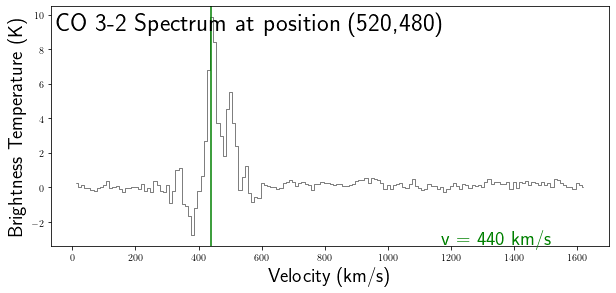

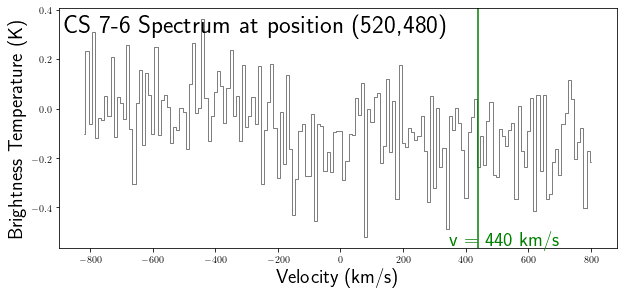

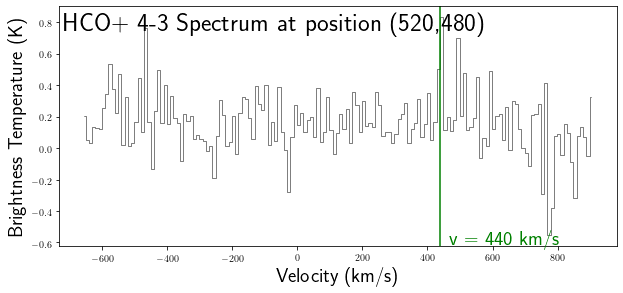

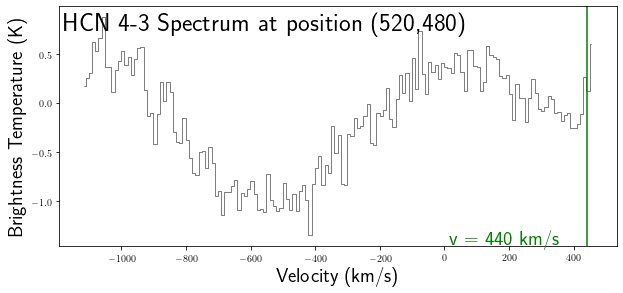

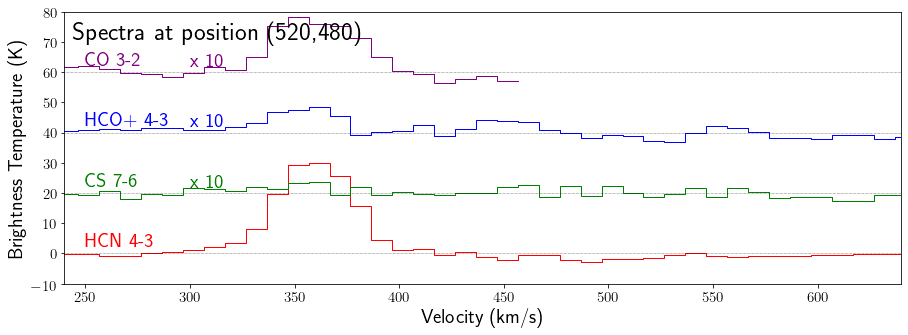

In [58]:
paths = pylab.array(['Circinus_spw0_contsub.image.pbcor.fits',\
                     'Circinus_spw1_contsub.image.pbcor.fits',\
                     'Circinus_spw2_contsub.image.pbcor.fits',\
                     'Circinus_spw3_contsub.image.pbcor.fits'])

mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])

center_x=520
center_y=480
coords=520,480

for i, path in enumerate(paths):
    
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    w = WCS(path)
    w = w.dropaxis(3)
    w = w.dropaxis(2)
        
    maxval = np.nanmax(cube,axis=0)
    cut_max = Cutout2D(maxval, (center_x,center_y), (200, 200), wcs=w)
    
        
    if i==2:
        peak_y,peak_x = np.where(cut_max.data==np.nanmax(cut_max.data))
        x = (100-peak_x)+center_x
        y = (100-peak_y)+center_y
        
        
    if i==3:
        peak_y2,peak_x2 = np.where(cut_max.data==np.nanmax(cut_max.data))
        x2 = (100-peak_x2)+center_x
        y2 = (100-peak_y2)+center_y 

for i, path in enumerate(paths):
  
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    size = chead["NAXIS3"] 
    rest= chead["RESTFRQ"] / 1.0e9
    f0 = chead["CRVAL3"] / 1.0e9 
    df = chead["CDELT3"] / 1.0e9 
    v0_kms = chead["ALTRVAL"] / 1000.0 
    dv_kms = df / rest * 2.998e5 * -1 
    pix = chead["CRPIX3"]
    x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
    x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

    bmaj = chead["BMAJ"] * 3600
    bmin = chead["BMIN"] * 3600
    Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)
    
    avg_spectrum = np.nanmean(cube[:,int(center_y)-10:int(center_y)+10,int(center_x)-10:int(center_x)+10],axis=(1,2))

    fig = pylab.figure(i,figsize=(10,15))
    ax1  = pylab.subplot(3,1,1)
    #ax1.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
    ax1.plot(x_vel,avg_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.axvline(440,color="green")
    pylab.annotate(s='v = 440 km/s', fontsize=20,color='green',xy=(0.7,0.01),xycoords="axes fraction");
    matplotlib.pyplot.annotate(s=mols[i]+' Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
 

for i, path in enumerate(paths):
    mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])
    scale = pylab.array([1,10,10,10]) 
    colors = pylab.array(['red','green','blue','purple'])

    figSpectra = pylab.figure(6,figsize=(15,5))
    axSpectra=pylab.subplot()
    
    sc = SpectralCube.read(path)
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio")
    sc_kms.allow_huge_operations=True
    sc_K_kms = sc_kms.to(u.K)

    if i==0:
        z,x,y = pylab.where(sc_K_kms.hdu.data==np.nanmax(sc_K_kms.hdu.data))
        vel, dec, ra = sc_K_kms.world[:,0,0]
        
    subcube = sc_K_kms[:,int(center_x+3)-10:int(center_x+3)+10,int(center_y-3)-10:int(center_y-3)+10]
    subcube=subcube.spectral_interpolate(spectral_grid=vel)
    spectrum = np.average(subcube.hdu.data,axis=(1,2))   
    
    if i==0:
        spectrum_HCN = spectrum.copy()       
    if i==1:
        spectrum_CS = spectrum.copy()
        matplotlib.pyplot.annotate(s='Spectra at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
    if i==2:
        spectrum_HCO = spectrum.copy()       
    if i==3:
        spectrum_CO = spectrum.copy()
        spectrum[pylab.where(vel.value>454)] = np.nan
    
    base_vels = pylab.where((vel.value>0)*(vel.value<200))        
    baseline = np.nanmean(spectrum[base_vels])
    v_sys = 0       
    axSpectra.plot(vel.value-v_sys,(spectrum-baseline)*scale[i]+i*20,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(-10, 80)
    pylab.xlim(240,640)
    pylab.axhline(i*20,color='black',ls=':',lw=0.5)
    pylab.text(250,i*20+2,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(300,i*20+2,"x %i"%scale[i],color=colors[i],fontsize=20)
    axSpectra.tick_params(axis = 'both', which = 'major', labelsize = 15)
    #pylab.savefig("Circinus_Torus_Separated_Spectra.pdf")

# Spectra at 475,480

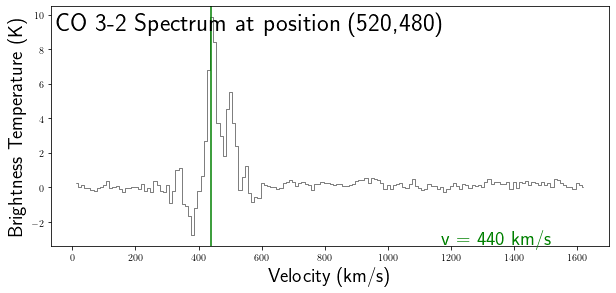

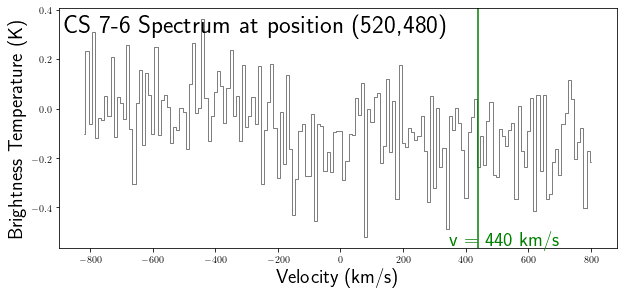

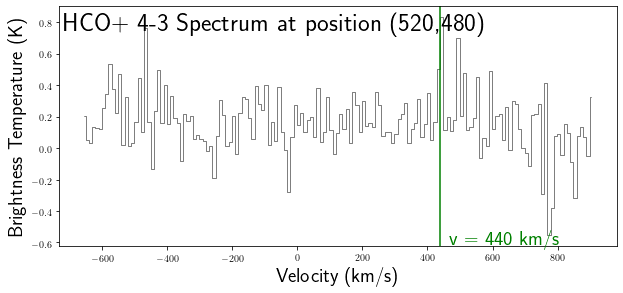

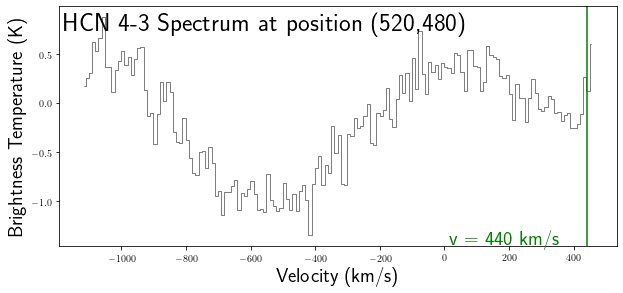

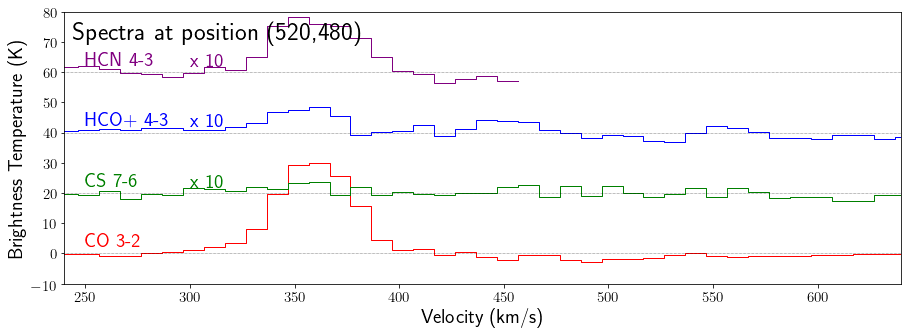

In [59]:
paths = pylab.array(['Circinus_spw0_contsub.image.pbcor.fits',\
                     'Circinus_spw1_contsub.image.pbcor.fits',\
                     'Circinus_spw2_contsub.image.pbcor.fits',\
                     'Circinus_spw3_contsub.image.pbcor.fits'])

mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])

center_x=520
center_y=480
coords=520,480

for i, path in enumerate(paths):
    
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    w = WCS(path)
    w = w.dropaxis(3)
    w = w.dropaxis(2)
        
    maxval = np.nanmax(cube,axis=0)
    cut_max = Cutout2D(maxval, (center_x,center_y), (200, 200), wcs=w)
    
        
    if i==2:
        peak_y,peak_x = np.where(cut_max.data==np.nanmax(cut_max.data))
        x = (100-peak_x)+center_x
        y = (100-peak_y)+center_y
        
        
    if i==3:
        peak_y2,peak_x2 = np.where(cut_max.data==np.nanmax(cut_max.data))
        x2 = (100-peak_x2)+center_x
        y2 = (100-peak_y2)+center_y 

for i, path in enumerate(paths):
  
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    size = chead["NAXIS3"] 
    rest= chead["RESTFRQ"] / 1.0e9
    f0 = chead["CRVAL3"] / 1.0e9 
    df = chead["CDELT3"] / 1.0e9 
    v0_kms = chead["ALTRVAL"] / 1000.0 
    dv_kms = df / rest * 2.998e5 * -1 
    pix = chead["CRPIX3"]
    x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
    x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

    bmaj = chead["BMAJ"] * 3600
    bmin = chead["BMIN"] * 3600
    Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)
    
    avg_spectrum = np.nanmean(cube[:,int(center_y)-10:int(center_y)+10,int(center_x)-10:int(center_x)+10],axis=(1,2))

    fig = pylab.figure(i,figsize=(10,15))
    ax1  = pylab.subplot(3,1,1)
    #ax1.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
    ax1.plot(x_vel,avg_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.axvline(440,color="green")
    pylab.annotate(s='v = 440 km/s', fontsize=20,color='green',xy=(0.7,0.01),xycoords="axes fraction");
    matplotlib.pyplot.annotate(s=mols[i]+' Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
 
    
for i, path in enumerate(paths):
    mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])
    scale = pylab.array([1,10,10,10]) 
    colors = pylab.array(['red','green','blue','purple'])

    figSpectra = pylab.figure(6,figsize=(15,5))
    axSpectra=pylab.subplot()
    
    sc = SpectralCube.read(path)
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio")
    sc_kms.allow_huge_operations=True
    sc_K_kms = sc_kms.to(u.K)

    if i==0:
        z,x,y = pylab.where(sc_K_kms.hdu.data==np.nanmax(sc_K_kms.hdu.data))
        vel, dec, ra = sc_K_kms.world[:,0,0]
        
    subcube = sc_K_kms[:,int(center_x+3)-10:int(center_x+3)+10,int(center_y-3)-10:int(center_y-3)+10]
    subcube=subcube.spectral_interpolate(spectral_grid=vel)
    spectrum = np.average(subcube.hdu.data,axis=(1,2))   
    
    if i==0:
        spectrum_HCN = spectrum.copy()       
    if i==1:
        spectrum_CS = spectrum.copy()
        matplotlib.pyplot.annotate(s='Spectra at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
    if i==2:
        spectrum_HCO = spectrum.copy()       
    if i==3:
        spectrum_CO = spectrum.copy()
        spectrum[pylab.where(vel.value>454)] = np.nan
    
    base_vels = pylab.where((vel.value>0)*(vel.value<200))        
    baseline = np.nanmean(spectrum[base_vels])
    v_sys = 0       
    axSpectra.plot(vel.value-v_sys,(spectrum-baseline)*scale[i]+i*20,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(-10, 80)
    pylab.xlim(240,640)
    pylab.axhline(i*20,color='black',ls=':',lw=0.5)
    pylab.text(250,i*20+2,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(300,i*20+2,"x %i"%scale[i],color=colors[i],fontsize=20)
    axSpectra.tick_params(axis = 'both', which = 'major', labelsize = 15)
    #pylab.savefig("Circinus_Torus_Separated_Spectra.pdf")

# Spectra at 460,525

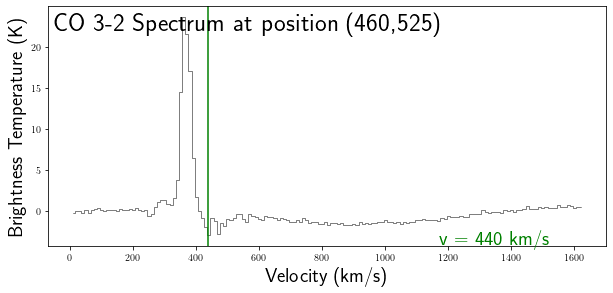

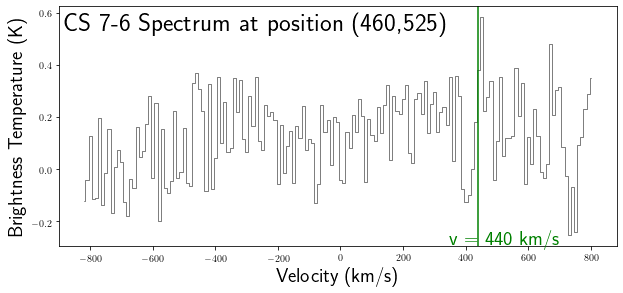

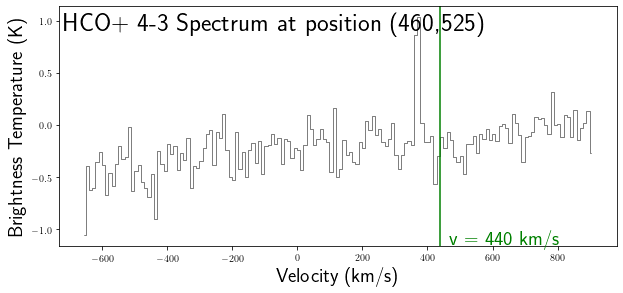

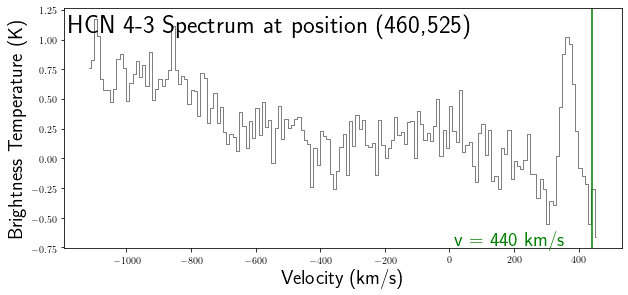

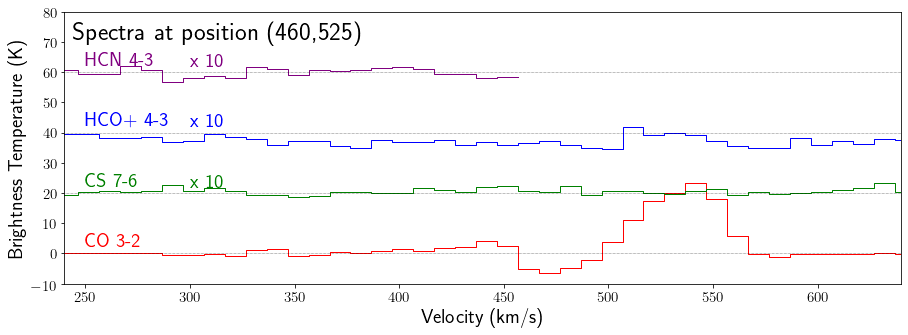

In [60]:
paths = pylab.array(['Circinus_spw0_contsub.image.pbcor.fits',\
                     'Circinus_spw1_contsub.image.pbcor.fits',\
                     'Circinus_spw2_contsub.image.pbcor.fits',\
                     'Circinus_spw3_contsub.image.pbcor.fits'])

mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])

center_x=460
center_y=525
coords=460,525

for i, path in enumerate(paths):
    
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    w = WCS(path)
    w = w.dropaxis(3)
    w = w.dropaxis(2)
        
    maxval = np.nanmax(cube,axis=0)
    cut_max = Cutout2D(maxval, (center_x,center_y), (200, 200), wcs=w)
    
        
    if i==2:
        peak_y,peak_x = np.where(cut_max.data==np.nanmax(cut_max.data))
        x = (100-peak_x)+center_x
        y = (100-peak_y)+center_y
        
        
    if i==3:
        peak_y2,peak_x2 = np.where(cut_max.data==np.nanmax(cut_max.data))
        x2 = (100-peak_x2)+center_x
        y2 = (100-peak_y2)+center_y 

for i, path in enumerate(paths):
  
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    size = chead["NAXIS3"] 
    rest= chead["RESTFRQ"] / 1.0e9
    f0 = chead["CRVAL3"] / 1.0e9 
    df = chead["CDELT3"] / 1.0e9 
    v0_kms = chead["ALTRVAL"] / 1000.0 
    dv_kms = df / rest * 2.998e5 * -1 
    pix = chead["CRPIX3"]
    x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
    x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

    bmaj = chead["BMAJ"] * 3600
    bmin = chead["BMIN"] * 3600
    Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)
    
    avg_spectrum = np.nanmean(cube[:,int(center_y)-10:int(center_y)+10,int(center_x)-10:int(center_x)+10],axis=(1,2))

    fig = pylab.figure(i,figsize=(10,15))
    ax1  = pylab.subplot(3,1,1)
    #ax1.plot(total_spectrum,color='black',lw=0.5,drawstyle='steps-mid')
    ax1.plot(x_vel,avg_spectrum*Jy_to_K,color='black',lw=0.5,drawstyle='steps-mid')
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.axvline(440,color="green")
    pylab.annotate(s='v = 440 km/s', fontsize=20,color='green',xy=(0.7,0.01),xycoords="axes fraction");
    matplotlib.pyplot.annotate(s=mols[i]+' Spectrum at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
 
    
for i, path in enumerate(paths):
    mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])
    scale = pylab.array([1,10,10,10]) 
    colors = pylab.array(['red','green','blue','purple'])

    figSpectra = pylab.figure(6,figsize=(15,5))
    axSpectra=pylab.subplot()
    
    sc = SpectralCube.read(path)
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio")
    sc_kms.allow_huge_operations=True
    sc_K_kms = sc_kms.to(u.K)

    if i==0:
        z,x,y = pylab.where(sc_K_kms.hdu.data==np.nanmax(sc_K_kms.hdu.data))
        vel, dec, ra = sc_K_kms.world[:,0,0]
        
    subcube = sc_K_kms[:,int(center_x+3)-10:int(center_x+3)+10,int(center_y-3)-10:int(center_y-3)+10]
    subcube=subcube.spectral_interpolate(spectral_grid=vel)
    spectrum = np.average(subcube.hdu.data,axis=(1,2))   
    
    if i==0:
        spectrum_HCN = spectrum.copy()       
    if i==1:
        spectrum_CS = spectrum.copy()
        matplotlib.pyplot.annotate(s='Spectra at position (%i,%i)'%(coords[0],coords[1]),fontsize=25,xy=(0.01,0.9),xycoords="axes fraction")
    if i==2:
        spectrum_HCO = spectrum.copy()       
    if i==3:
        spectrum_CO = spectrum.copy()
        spectrum[pylab.where(vel.value>454)] = np.nan
    
    base_vels = pylab.where((vel.value>0)*(vel.value<200))        
    baseline = np.nanmean(spectrum[base_vels])
    v_sys = 0       
    axSpectra.plot(vel.value-v_sys,(spectrum-baseline)*scale[i]+i*20,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(-10, 80)
    pylab.xlim(240,640)
    pylab.axhline(i*20,color='black',ls=':',lw=0.5)
    pylab.text(250,i*20+2,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(300,i*20+2,"x %i"%scale[i],color=colors[i],fontsize=20)
    axSpectra.tick_params(axis = 'both', which = 'major', labelsize = 15)
    #pylab.savefig("Circinus_Torus_Separated_Spectra.pdf")

# Spectra Combined

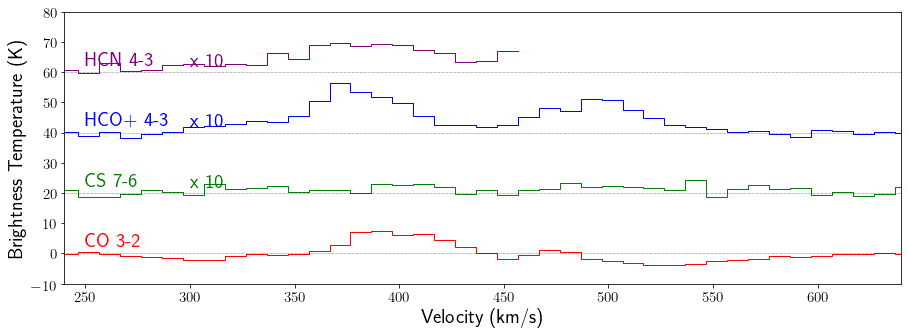

In [17]:
paths = pylab.array(['Circinus_spw0.image.pbcor.fits',
                     'Circinus_spw1.image.pbcor.fits',
                     'Circinus_spw2.image.pbcor.fits',
                     'Circinus_spw3.image.pbcor.fits'])

mols = pylab.array(['CO 3-2','CS 7-6', 'HCO+ 4-3', 'HCN 4-3'])
scale = pylab.array([1,10,10,10]) 
colors = pylab.array(['red','green','blue','purple'])

figSpectra = pylab.figure(6,figsize=(15,5))
axSpectra=pylab.subplot() 

for i, path in enumerate(paths):
    sc = SpectralCube.read(path)
    sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio")
    sc_kms.allow_huge_operations=True
    sc_K_kms = sc_kms.to(u.K)

    if i==0:
        z,x,y = pylab.where(sc_K_kms.hdu.data==np.nanmax(sc_K_kms.hdu.data))
        vel, dec, ra = sc_K_kms.world[:,0,0]
        
    subcube = sc_K_kms[:,int(center_x+3)-10:int(center_x+3)+10,int(center_y-3)-10:int(center_y-3)+10]
    subcube=subcube.spectral_interpolate(spectral_grid=vel)
    spectrum = np.average(subcube.hdu.data,axis=(1,2))   
    
    if i==0:
        spectrum_CO = spectrum.copy()       
    if i==1:
        spectrum_CS = spectrum.copy()       
    if i==2:
        spectrum_HCO = spectrum.copy()       
    if i==3:
        spectrum_HCN = spectrum.copy()
        spectrum[pylab.where(vel.value>454)] = np.nan
    
    base_vels = pylab.where((vel.value>0)*(vel.value<200))        
    baseline = np.nanmean(spectrum[base_vels])
    v_sys = 0       
    axSpectra.plot(vel.value-v_sys,(spectrum-baseline)*scale[i]+i*20,lw=1,drawstyle='steps-mid',color=colors[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    pylab.ylim(-10, 80)
    pylab.xlim(240,640)
    pylab.axhline(i*20,color='black',ls=':',lw=0.5)
    pylab.text(250,i*20+2,mols[i],color=colors[i],fontsize=20)
    if scale[i]!=1:
        pylab.text(300,i*20+2,"x %i"%scale[i],color=colors[i],fontsize=20)
    axSpectra.tick_params(axis = 'both', which = 'major', labelsize = 15)
    #pylab.savefig("Circinus_Torus_Separated_Spectra.pdf")

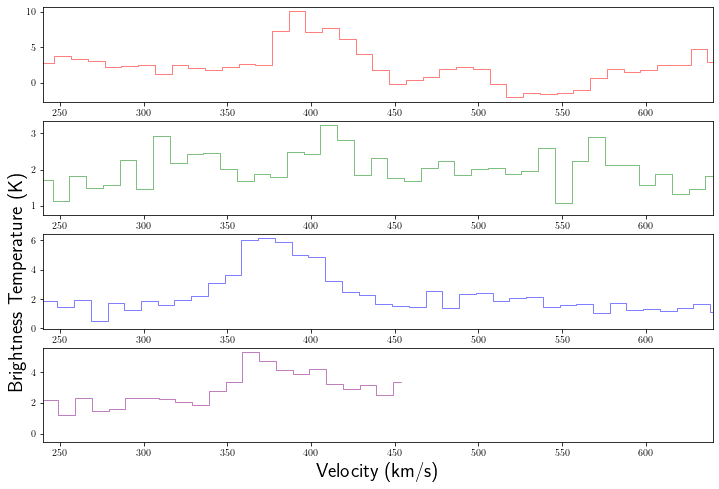

In [22]:
for i, path in enumerate(paths):
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    w = WCS(path)
    w = w.dropaxis(3)
    w = w.dropaxis(2)
      
    maxval = np.nanmax(cube,axis=0)
    cut_max = Cutout2D(maxval, (center_x,center_y), (200, 200), wcs=w)

    if i==2:
        peak_y,peak_x = np.where(cut_max.data==np.nanmax(cut_max.data))
        x = (100-peak_x)+center_x
        y = (100-peak_y)+center_y
        
    if i==3:
        peak_y2,peak_x2 = np.where(cut_max.data==np.nanmax(cut_max.data))
        x2 = (100-peak_x2)+center_x
        y2 = (100-peak_y2)+center_y 

pylab.figure(1,figsize=(12,8))
        
for i, path in enumerate(paths):
  
    if i==3:
         pylab.ylabel('Brightness Temperature (K)',fontsize=20)
    
    cube = np.squeeze(fits.getdata(path))
    chead = fits.getheader(path)  

    size = chead["NAXIS3"] 
    rest= chead["RESTFRQ"] / 1.0e9
    f0 = chead["CRVAL3"] / 1.0e9 
    df = chead["CDELT3"] / 1.0e9 
    v0_kms = chead["ALTRVAL"] / 1000.0 
    dv_kms = df / rest * 2.998e5 * -1 
    pix = chead["CRPIX3"]
    x_freq = np.arange(0,size)*df+f0+(1-pix)*df 
    x_vel = np.arange(0,size)*dv_kms+v0_kms+(1-pix)*dv_kms 

    bmaj = chead["BMAJ"] * 3600
    bmin = chead["BMIN"] * 3600
    Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)
    
    avg_spectrum = np.nanmean(cube[:,int(center_x)-3:int(center_x)+3,int(center_y)-3:int(center_y)+3],axis=(1,2))
    ax1  = pylab.subplot(4,1,1+i)
    #ax1.plot(total_spectrum,color=colors[i],lw=0.5,drawstyle='steps-mid')
    ax1.plot(x_vel,avg_spectrum*Jy_to_K,color=colors[i],lw=0.5,drawstyle='steps-mid',label=mols[i])
    pylab.xlabel('Velocity (km/s)',fontsize=20)
    pylab.xlim(240,640)
    #pylab.axvline(440,color="green")
    #pylab.annotate(s='v = 440 km/s', fontsize=20,color='green',xy=(0.7,0.01),xycoords="axes fraction");
    #pylab.savefig("Circinus_Torus_Overlapping_Spectra.pdf")
    

Param #0   AMPLITUDE0 =      11.8908 +/-               0   Range:   [10,30]
Param #1       SHIFT0 =     -73.2266 +/-               0   Range: [-75,-65]
Param #2       WIDTH0 =     0.424665 +/-               0   Range:[0.424665,6.36997]
Param #3   AMPLITUDE1 =           10 +/-               0   Range:   [10,30]
Param #4       SHIFT1 =     -61.6662 +/-        0.532866   Range: [-65,-55]
Param #5       WIDTH1 =      3.72824 +/-        0.439885   Range:[0.424665,6.36997]

The peak intensities are 11.9 +/- 0.0 K and 10.0 +/- 0.0 K

The integrated intensities are 12.7 +/- 0.0 K km/s and 93.5 +/- 11.0 K km/s


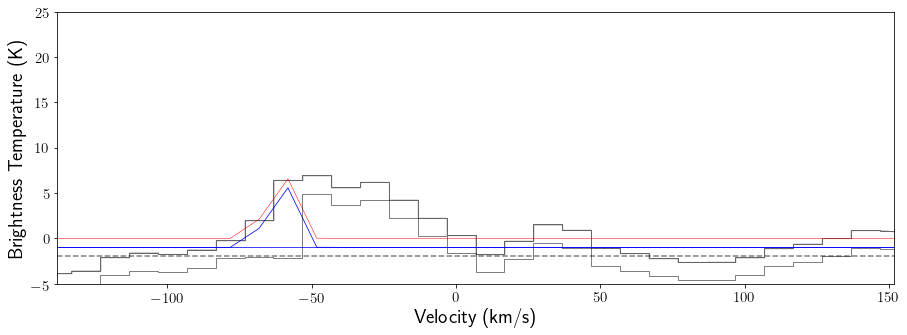

In [114]:
zoom = np.where((vel.value<600)*(vel.value>300))            
zoom_CO = spectrum_CO[zoom]
zoom_vel = vel[zoom]-440*u.km/u.s

error = np.zeros(np.size(zoom))                                       
        
wheremeas = np.where((zoom_vel.value>-95)*(zoom_vel.value<-80))
meas = np.std(zoom_CO[wheremeas])  
error = error + meas

exclude=pylab.array([-80,-55])            
guesses=[20,-70,10/2.3548,15,-60,10/2.3548]                                          
limits = [(10,30),(-75,-65),(1/2.3548,15/2.3548),(10,30),(-65,-55),(1/2.3548,15/2.3548)]                                        
limited = [(True,True),(True,True),(True,True),(True,True),(True,True),(True,True)]
                                         
sp = psk.Spectrum(data=zoom_CO,xarr=zoom_vel,error=error,unit='K')
                                                          
pylab.figure(1,figsize=(15,5))              
sp.plotter(axis=pylab.subplot(1,1,1))       

sp.baseline(order=1,exclude=exclude)                                                   
sp.specfit(guesses=guesses,limits=limits,limited=limited)
sp.plotter(axis=pylab.subplot(1,1,1),errstyle='fill')                                          
sp.specfit.plot_fit(axis=pylab.subplot(1,1,1),annotate=False)                                         
sp.specfit.plot_components(axis=pylab.subplot(1,1,1),add_baseline=False,component_yoffset=-1)                                        
sp.specfit.plotresiduals(axis=pylab.subplot(1,1,1),clear=False, yoffset=-2,label=False)

sp.plotter.axis.set_ylim(-5,25)
pylab.xlabel("Velocity (km/s)",fontsize=20)
pylab.ylabel("Brightness Temperature (K)",fontsize=20)
pylab.tick_params(axis='both', which='major',labelsize=15)

print(sp.specfit.parinfo)                   
Amp_0 = sp.specfit.parinfo[0].value         
Amp_err_0 = sp.specfit.parinfo[0].error
dv_0 = sp.specfit.parinfo[2].value
dv_err_0 = sp.specfit.parinfo[2].error
flux_0 = Amp_0 * dv_0 * np.sqrt(2*np.pi)
flux_err_0 = np.sqrt(((Amp_err_0**2+(np.mean(sp.error)/3.0)**2)**0.5/Amp_0)**2+(dv_err_0/dv_0)**2) * flux_0

Amp_1 = sp.specfit.parinfo[3].value
Amp_err_1 = sp.specfit.parinfo[3].error
dv_1 = sp.specfit.parinfo[5].value
dv_err_1 = sp.specfit.parinfo[5].error
flux_1 = Amp_1 * dv_1 * np.sqrt(2*np.pi)
flux_err_1 = np.sqrt(((Amp_err_1**2+(np.mean(sp.error)/3.0)**2)**0.5/Amp_1)**2+(dv_err_1/dv_1)**2) * flux_1

print("")
print("The peak intensities are %1.1f +/- %1.1f K and %1.1f +/- %1.1f K"%(Amp_0,Amp_err_0,Amp_1,Amp_err_1))
print("")
print("The integrated intensities are %1.1f +/- %1.1f K km/s and %1.1f +/- %1.1f K km/s"%(flux_0,flux_err_0,flux_1,flux_err_1))

# Moment Maps


In [58]:
fullcubeCO = SpectralCube.read('Circinus_spw0_contsub.image.pbcor.fits')
cubeCO = fullcubeCO.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(+200 * u.km / u.s, +600 * u.km / u.s) 
cubeCO_kms = cubeCO.with_spectral_unit(u.km/u.s,velocity_convention="radio") 
cubeCO_slab = cubeCO_kms.spectral_slab(200. *u.km / u.s, 600. *u.km / u.s) 
cubeCO_slab.allow_huge_operations=True
cubeCO_bin = cubeCO_slab.downsample_axis(3,axis=0) 
cubeCO_K_kms = cubeCO_bin.to(u.K)
print('CO: ',cubeCO_K_kms,'\n')

cubeHCO = SpectralCube.read('Circinus_spw2_contsub.image.pbcor.fits')
cubeHCO_kms = cubeHCO.with_spectral_unit(u.km/u.s,velocity_convention="radio") 
cubeHCO_slab = cubeHCO_kms.spectral_slab(200. *u.km / u.s, 600. *u.km / u.s)
cubeHCO_slab.allow_huge_operations=True
cubeHCO_bin = cubeHCO_slab.downsample_axis(3,axis=0) 
cubeHCO_K_kms = cubeHCO_bin.to(u.K)
print('HCO: ',cubeHCO_K_kms,'\n')

cubeHCN = SpectralCube.read('Circinus_spw3_contsub.image.pbcor.fits')
cubeHCN_kms = cubeHCN.with_spectral_unit(u.km/u.s,velocity_convention="radio") 
cubeHCN_slab = cubeHCN_kms.spectral_slab(200. *u.km / u.s, 600. *u.km / u.s) 
cubeHCN_slab.allow_huge_operations=True
cubeHCN_bin = cubeHCN_slab.downsample_axis(3,axis=0) 
cubeHCN_K_kms = cubeHCN_bin.to(u.K)
print('HCN: ',cubeHCN_K_kms,'\n')

CO:  SpectralCube with shape=(14, 1024, 1024) and unit=K:
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   213.284470 deg:  213.298093 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -65.341863 deg:  -65.336180 deg
 n_s:     14  type_s: VRAD      unit_s: km / s  range:      211.748 km / s:     601.748 km / s 

HCO:  SpectralCube with shape=(14, 1024, 1024) and unit=K:
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   213.284470 deg:  213.298093 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -65.341863 deg:  -65.336180 deg
 n_s:     14  type_s: VRAD      unit_s: km / s  range:      213.482 km / s:     603.482 km / s 

HCN:  SpectralCube with shape=(9, 1024, 1024) and unit=K:
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   213.284470 deg:  213.298093 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -65.341863 deg:  -65.336180 deg
 n_s:      9  type_s: VRAD      unit_s: km / s  range:      214.054 km / s:     454.054 km / s 



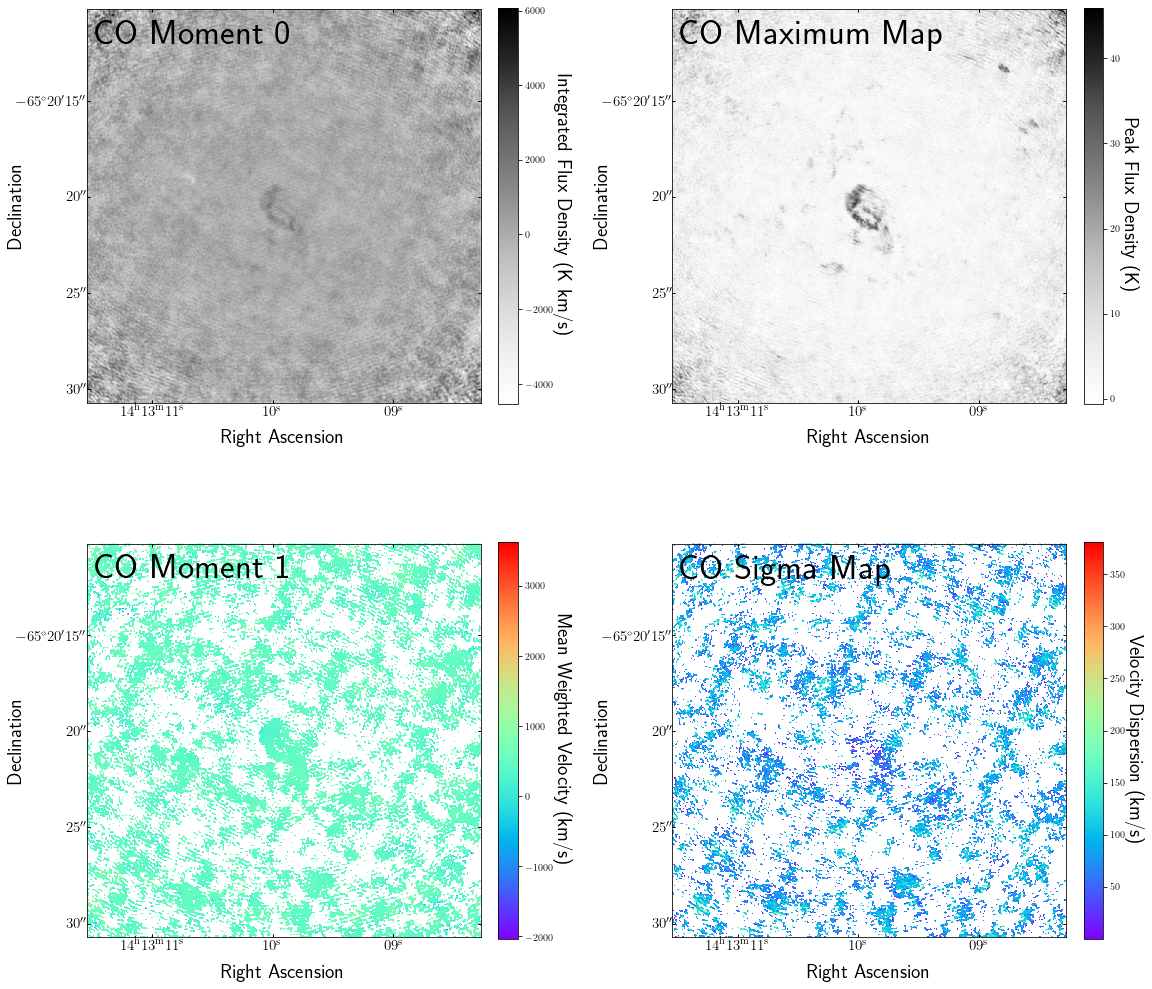

In [88]:
moment_0_CO  = cubeCO_K_kms.moment(order=0,how='slice')
max_map_CO   = cubeCO_K_kms.apply_numpy_function(np.nanmax,axis=0) 
moment_1_CO  = cubeCO_K_kms.moment(order=1,how='slice')
sigma_map_CO = cubeCO_K_kms.linewidth_sigma(how='slice')

badpix_CO = pylab.where(moment_0_CO.hdu.data<100)
moment_1_CO.hdu.data[badpix_CO] = np.nan
sigma_map_CO.hdu.data[badpix_CO] = np.nan

fig1_CO = pylab.figure(1,figsize=(15,15))

ax1_CO = pylab.subplot(2,2,1,projection=moment_0_CO.wcs) 
im1_CO = pylab.imshow(moment_0_CO.hdu.data,cmap='Greys')
RA = ax1_CO.coords[0]                                                                  
Dec = ax1_CO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1_CO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1_CO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density (K km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='CO Moment 0',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax2_CO = pylab.subplot(2,2,2,projection=moment_0_CO.wcs) 
im2_CO = pylab.imshow(max_map_CO.data,cmap='Greys')
RA = ax2_CO.coords[0]                                                                  
Dec = ax2_CO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax2_CO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2_CO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Flux Density (K)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='CO Maximum Map',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")

ax3_CO = pylab.subplot(2,2,3,projection=moment_1_CO.wcs) 
im3_CO = pylab.imshow(moment_1_CO.hdu.data,cmap='rainbow')
RA = ax3_CO.coords[0]                                                                  
Dec = ax3_CO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3_CO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3_CO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='CO Moment 1',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")

ax4_CO = pylab.subplot(2,2,4,projection=moment_0_CO.wcs) 
im4_CO = pylab.imshow(sigma_map_CO.hdu.data,cmap='rainbow')
RA = ax4_CO.coords[0]                                                                  
Dec = ax4_CO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax4_CO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4_CO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='CO Sigma Map',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction");

pylab.tight_layout(w_pad=10)


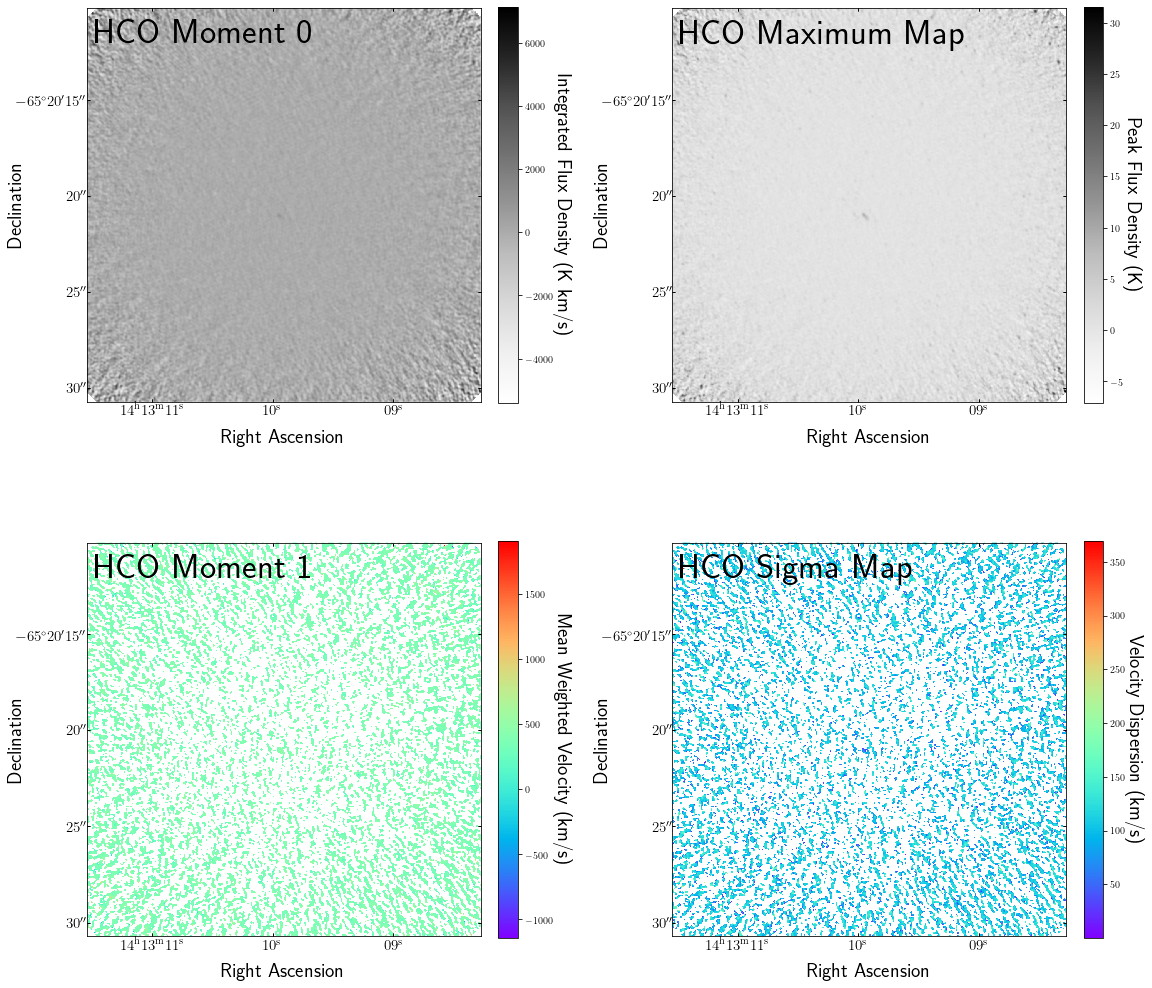

In [60]:
moment_0_HCO  = cubeHCO_K_kms.moment(order=0,how='slice')
max_map_HCO   = cubeHCO_K_kms.apply_numpy_function(np.nanmax,axis=0) 
moment_1_HCO  = cubeHCO_K_kms.moment(order=1,how='slice')
sigma_map_HCO = cubeHCO_K_kms.linewidth_sigma(how='slice')

badpix_HCO = pylab.where(moment_0_HCO.hdu.data<100)
moment_1_HCO.hdu.data[badpix_HCO] = np.nan
sigma_map_HCO.hdu.data[badpix_HCO] = np.nan

fig1_HCO = pylab.figure(1,figsize=(15,15))

ax1_HCO = pylab.subplot(2,2,1,projection=moment_0_HCO.wcs) 
im1_HCO = pylab.imshow(moment_0_HCO.hdu.data,cmap='Greys')
RA = ax1_HCO.coords[0]                                                                  
Dec = ax1_HCO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1_HCO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1_HCO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density (K km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCO Moment 0',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax2_HCO = pylab.subplot(2,2,2,projection=moment_0_HCO.wcs) 
im2_HCO = pylab.imshow(max_map_HCO.data,cmap='Greys')
RA = ax2_HCO.coords[0]                                                                  
Dec = ax2_HCO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax2_HCO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2_HCO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Flux Density (K)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCO Maximum Map',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")

ax3_HCO = pylab.subplot(2,2,3,projection=moment_1_HCO.wcs) 
im3_HCO = pylab.imshow(moment_1_HCO.hdu.data,cmap='rainbow')
RA = ax3_HCO.coords[0]                                                                  
Dec = ax3_HCO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3_HCO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3_HCO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCO Moment 1',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")

ax4_HCO = pylab.subplot(2,2,4,projection=moment_0_HCO.wcs) 
im4_HCO = pylab.imshow(sigma_map_HCO.hdu.data,cmap='rainbow')
RA = ax4_HCO.coords[0]                                                                  
Dec = ax4_HCO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax4_HCO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4_HCO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCO Sigma Map',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction");

pylab.tight_layout(w_pad=10)


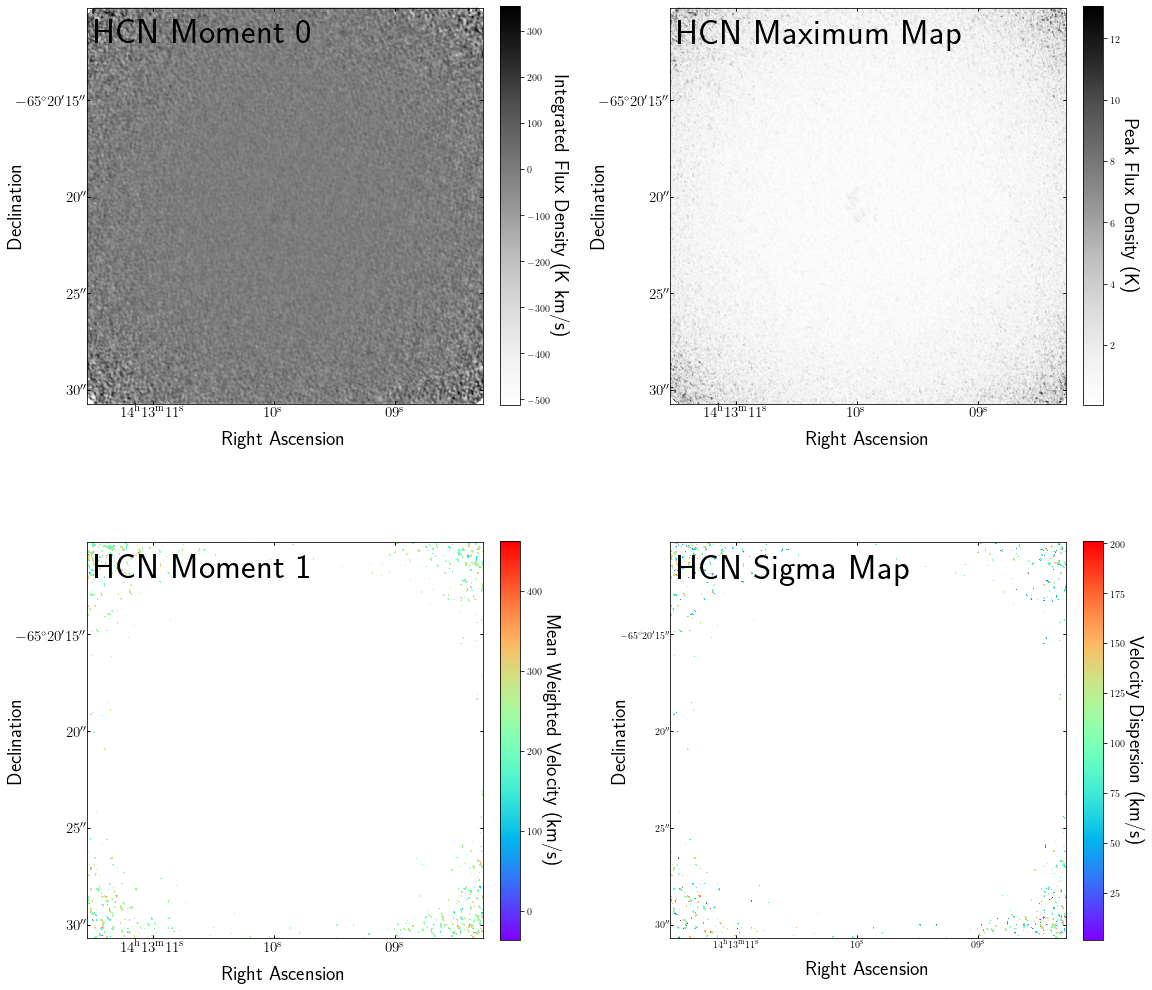

In [61]:
moment_0_HCN  = cubeHCN_K_kms.moment(order=0,how='slice')
max_map_HCN   = cubeHCN_K_kms.apply_numpy_function(np.nanmax,axis=0) 
moment_1_HCN  = cubeHCN_K_kms.moment(order=1,how='slice')
sigma_map_HCN = cubeHCN_K_kms.linewidth_sigma(how='slice')

badpix_HCN = pylab.where(moment_0_HCN.hdu.data<100)
moment_1_HCN.hdu.data[badpix_HCN] = np.nan
sigma_map_HCN.hdu.data[badpix_HCN] = np.nan

fig1_HCN = pylab.figure(1,figsize=(15,15))

ax1_HCN = pylab.subplot(2,2,1,projection=moment_0_HCN.wcs) 
im1_HCN = pylab.imshow(moment_0_HCN.hdu.data,cmap='Greys')
RA = ax1_HCN.coords[0]                                                                  
Dec = ax1_HCN.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1_HCN.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1_HCN,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density (K km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCN Moment 0',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")  
#pylab.contour(image_2D,[0.0015,0.002,0.0025,0.003],colors='red')

ax2_HCN = pylab.subplot(2,2,2,projection=moment_0_HCN.wcs) 
im2_HCN = pylab.imshow(max_map_HCN.data,cmap='Greys')
RA = ax2_HCN.coords[0]                                                                  
Dec = ax2_HCN.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax2_HCN.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2_HCN,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Peak Flux Density (K)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCN Maximum Map',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")

ax3_HCN = pylab.subplot(2,2,3,projection=moment_1_HCN.wcs) 
im3_HCN = pylab.imshow(moment_1_HCN.hdu.data,cmap='rainbow')
RA = ax3_HCN.coords[0]                                                                  
Dec = ax3_HCN.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax3_HCN.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im3_HCN,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCN Moment 1',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")

ax4_HCN = pylab.subplot(2,2,4,projection=moment_0_HCN.wcs) 
im4_HCN = pylab.imshow(sigma_map_HCN.hdu.data,cmap='rainbow')
RA = ax4_HCN.coords[0]                                                                  
Dec = ax4_HCN.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax4_HCO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im4_HCN,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Velocity Dispersion (km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCN Sigma Map',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction");

pylab.tight_layout(w_pad=10)


# HCN/HCO Ratio

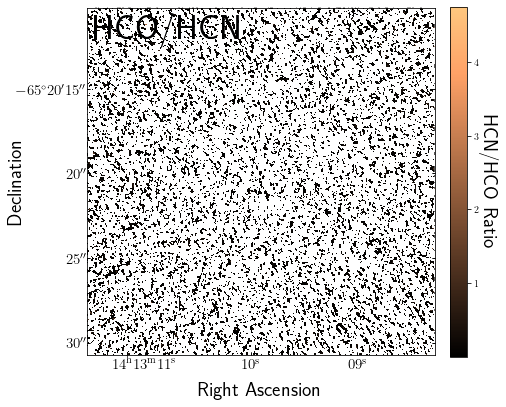

In [102]:
HCO_moment0_reproject, footprint = reproject_interp(moment_0_HCO.hdu,moment_0_HCN.header)

                                                        # Now that images are same size, compute ratio of moment maps
ratio_HCN_HCO = moment_0_HCN.hdu.data/HCO_moment0_reproject

badpixHCO = pylab.where(HCO_moment0_reproject<50)
badpixHCO2 = pylab.where(moment_0_HCN.hdu.data<0)           
ratio_HCN_HCO[badpixHCO] = np.nan                        
ratio_HCN_HCO[badpixHCO2] = np.nan

fig1HCNHCO = pylab.figure(1,figsize=(15,15))

ax1HCNHCO = pylab.subplot(2,2,1,projection=moment_0_HCN.wcs) 
im1HCNHCO = pylab.imshow(ratio_HCN_HCO,cmap='copper')
RA = ax1HCNHCO.coords[0]                                                                  
Dec = ax1HCNHCO.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1HCNHCO.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1HCNHCO,fraction=0.046,pad=0.04)                                      
cb.set_label(label='HCN/HCO Ratio',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s='HCO/HCN',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction");  
    

In [62]:
print('Moment_0_CO WCS: \n',moment_0_CO.wcs,'\n')
print('Moment_1_CO WCS: \n',moment_1_CO.wcs,'\n')
print('sigma_map_CO WCS: \n',sigma_map_CO.wcs,'\n\n')

print('Moment_0_HCO WCS: \n',moment_0_HCO.wcs,'\n')
print('Moment_1_HCO WCS: \n',moment_1_HCO.wcs,'\n')
print('Sigma_map_HCO WCS: \n',sigma_map_HCO.wcs,'\n')

print('Moment_0_HCN WCS: \n',moment_0_HCN.wcs,'\n')
print('Moment_1_HCN WCS: \n',moment_1_HCN.wcs,'\n')
print('Sigma_map_HCN WCS: \n',sigma_map_HCN.wcs,'\n')

hi_column_density_CO = moment_0_CO * 1.82 * 10**18 / (u.cm * u.cm) * u.s / u.K / u.km
hi_column_density_HCO = moment_0_HCO * 1.82 * 10**18 / (u.cm * u.cm) * u.s / u.K / u.km
hi_column_density_HCN = moment_0_HCN * 1.82 * 10**18 / (u.cm * u.cm) * u.s / u.K / u.km

Moment_0_CO WCS: 
 WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 213.291275  -65.339019  
CRPIX : 513.0  513.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -5.555555555556e-06  5.555555555556e-06  
NAXIS : 0  0 

Moment_1_CO WCS: 
 WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 213.291275  -65.339019  
CRPIX : 513.0  513.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -5.555555555556e-06  5.555555555556e-06  
NAXIS : 0  0 

sigma_map_CO WCS: 
 WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 213.291275  -65.339019  
CRPIX : 513.0  513.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -5.555555555556e-06  5.555555555556e-06  
NAXIS : 0  0 


Moment_0_HCO WCS: 
 WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 213.291275  -65.339019  
CRPIX : 513.0  513.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -5.5555555

# Masked Moment Maps

Text(156.1388392857138, 25, '5 pc')

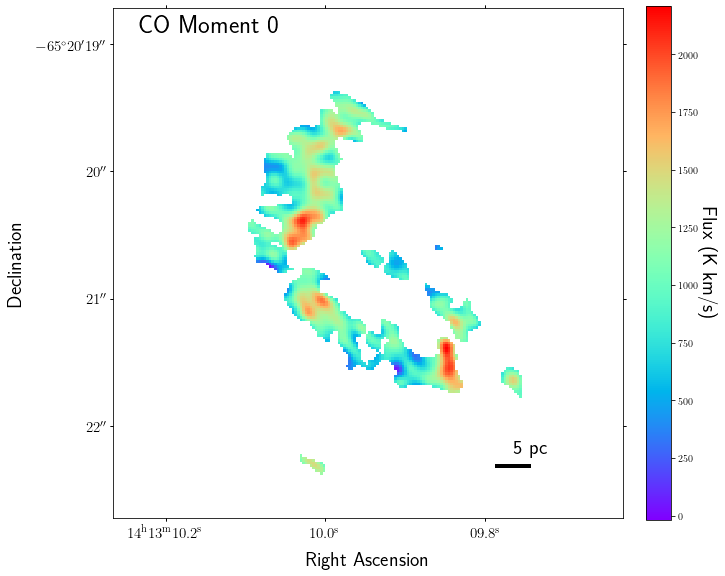

In [63]:
moment_0_CO_masked = moment_0_CO.hdu.data
badvalsCO = pylab.where(max_map_CO<20)
moment_0_CO_masked[badvalsCO] = np.nan
cutoutCO_max = Cutout2D(max_map_CO, (center_y,center_x), (200, 200), wcs=wC)

cutoutCO0 = Cutout2D(moment_0_CO_masked, (center_y,center_x), (200, 200), wcs=wC)
figCO0 = pylab.figure(1,figsize=(10,10))
axCO0 = pylab.subplot(projection=cutoutCO0.wcs)
lonCO0 = axCO0.coords[0]
latCO0 = axCO0.coords[1]
imCO0 = pylab.imshow(cutoutCO0.data,cmap='rainbow')
pylab.xlabel('Right Ascension',fontsize=20)
pylab.ylabel('Declination',fontsize=20)
axCO0.tick_params(axis = 'both', which = 'major', labelsize = 15)
cbCO0=pylab.colorbar(imCO0,fraction=0.046,pad=0.04)                                      
cbCO0.set_label(label='Flux (K km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='CO Moment 0',fontsize=25,xy=(0.05,0.95),xycoords="axes fraction")
length = 5/4.2e6*206265/(cheaderC['CDELT2']*3600)
pylab.plot((150,150+length),(20,20),ls='-',lw=4,color='black')
pylab.text(150+length/2, 25, '5 pc',fontsize=20,color='black')
#pylab.savefig("Circinus_Torus_CO_Moment_0.pdf")

Text(156.1388392857138, 25, '5 pc')

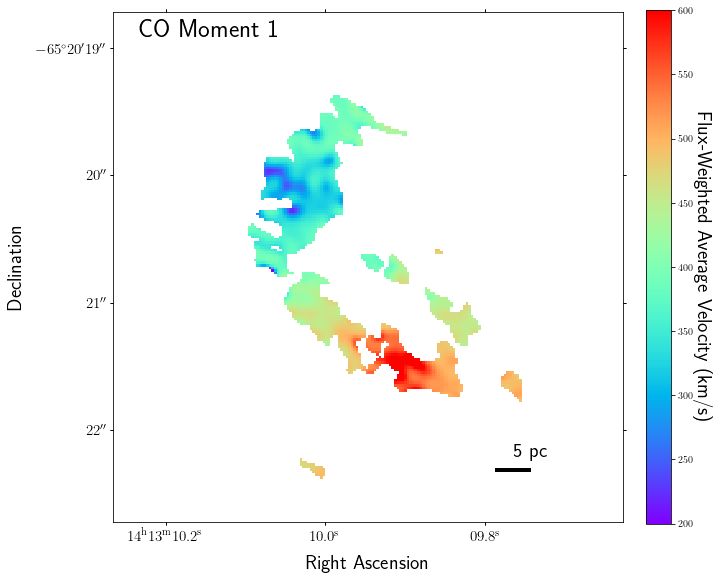

In [64]:
moment_1_CO_masked = moment_1_CO.hdu.data
moment_1_CO_masked[badvalsCO] = np.nan

cutoutCO1 = Cutout2D(moment_1_CO_masked, (center_y,center_x), (200, 200), wcs=wC)
figCO1 = pylab.figure(1,figsize=(10,10))
axCO1 = pylab.subplot(projection=cutoutCO1.wcs)
lonCO1 = axCO1.coords[0]
latCO1 = axCO1.coords[1]
imCO1 = pylab.imshow(cutoutCO1.data,cmap='rainbow',vmin=200,vmax=600)
pylab.xlabel('Right Ascension',fontsize=20)
pylab.ylabel('Declination',fontsize=20)
axCO1.tick_params(axis = 'both', which = 'major', labelsize = 15)
cbCO1=pylab.colorbar(imCO1,fraction=0.046,pad=0.04)                                      
cbCO1.set_label(label='Flux-Weighted Average Velocity (km/s)',fontsize=20,rotation=270,labelpad=20) 
cbCO1.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='CO Moment 1',fontsize=25,xy=(0.05,0.95),xycoords="axes fraction")
length = 5/4.2e6*206265/(cheaderC['CDELT2']*3600)
pylab.plot((150,150+length),(20,20),ls='-',lw=4,color='black')
pylab.text(150+length/2, 25, '5 pc',fontsize=20,color='black')
#pylab.savefig("Circinus_Torus_CO_Moment_1.pdf")

Text(156.1388392857138, 25, '5 pc')

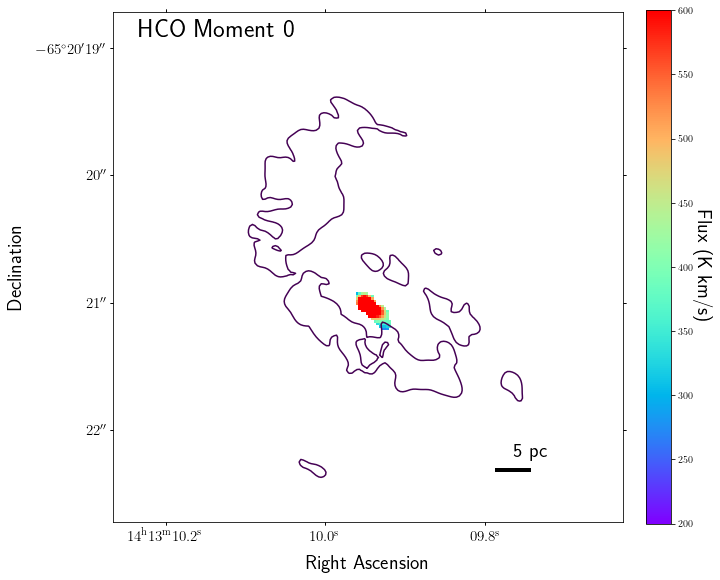

In [65]:
moment_0_HCO_masked = moment_0_HCO.hdu.data
badvalsHCO = pylab.where(max_map_HCO<5)
moment_0_HCO_masked[badvalsHCO] = np.nan

cutoutHCO0 = Cutout2D(moment_0_HCO_masked, (center_y,center_x), (200, 200), wcs=wE)
figHCO0 = pylab.figure(1,figsize=(10,10))
axHCO0 = pylab.subplot(projection=cutoutHCO0.wcs)
lonHCO0 = axHCO0.coords[0]
latHCO0 = axHCO0.coords[1]
imHCO0 = pylab.imshow(cutoutHCO0.data,cmap='rainbow',vmin=200,vmax=600)
pylab.contour(cutoutCO_max.data,[20])
pylab.xlabel('Right Ascension',fontsize=20)
pylab.ylabel('Declination',fontsize=20)
axHCO0.tick_params(axis = 'both', which = 'major', labelsize = 15)
cbHCO0=pylab.colorbar(imHCO0,fraction=0.046,pad=0.04)                                      
cbHCO0.set_label(label='Flux (K km/s)',fontsize=20,rotation=270,labelpad=20) 
cbHCO0.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='HCO Moment 0',fontsize=25,xy=(0.05,0.95),xycoords="axes fraction")
length = 5/4.2e6*206265/(cheaderC['CDELT2']*3600)
pylab.plot((150,150+length),(20,20),ls='-',lw=4,color='black')
pylab.text(150+length/2, 25, '5 pc',fontsize=20,color='black')
#pylab.savefig("Circinus_Torus_HCO_Moment_0.pdf")

Text(156.1388392857138, 25, '5 pc')

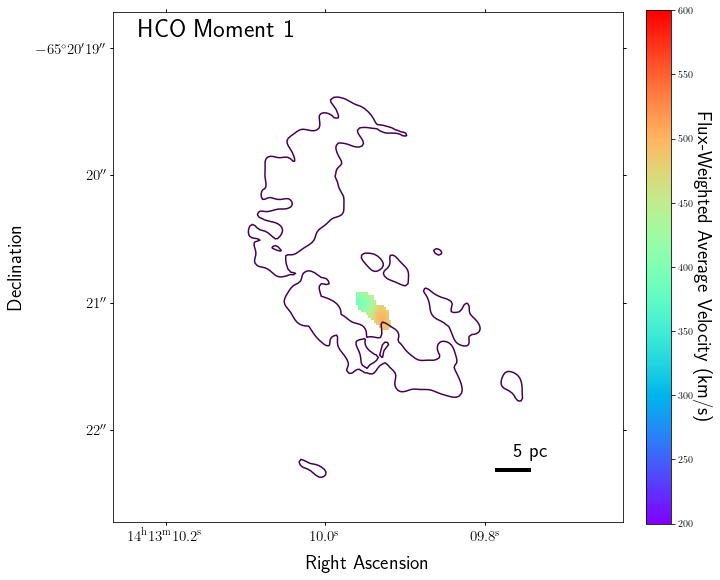

In [66]:
moment_1_HCO_masked = moment_1_HCO.hdu.data
moment_1_HCO_masked[badvalsHCO] = np.nan

cutoutHCO1 = Cutout2D(moment_1_HCO_masked, (center_y,center_x), (200, 200), wcs=wE)
figHCO1 = pylab.figure(1,figsize=(10,10))
axHCO1 = pylab.subplot(projection=cutoutHCO1.wcs)
lonHCO1 = axHCO1.coords[0]
latHCO1 = axHCO1.coords[1]
imHCO1 = pylab.imshow(cutoutHCO1.data,cmap='rainbow',vmin=200,vmax=600)
pylab.contour(cutoutCO_max.data,[20])
pylab.xlabel('Right Ascension',fontsize=20)
pylab.ylabel('Declination',fontsize=20)
axHCO1.tick_params(axis = 'both', which = 'major', labelsize = 15)
cbHCO1=pylab.colorbar(imHCO1,fraction=0.046,pad=0.04)                                      
cbHCO1.set_label(label='Flux-Weighted Average Velocity (km/s)',fontsize=20,rotation=270,labelpad=20) 
cbHCO1.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='HCO Moment 1',fontsize=25,xy=(0.05,0.95),xycoords="axes fraction")
length = 5/4.2e6*206265/(cheaderC['CDELT2']*3600)
pylab.plot((150,150+length),(20,20),ls='-',lw=4,color='black')
pylab.text(150+length/2, 25, '5 pc',fontsize=20,color='black')
#pylab.savefig("Circinus_Torus_HCO_Moment_1.pdf")

353.70503754721307
-513.1066904363885


Text(156.1388392857138, 25, '5 pc')

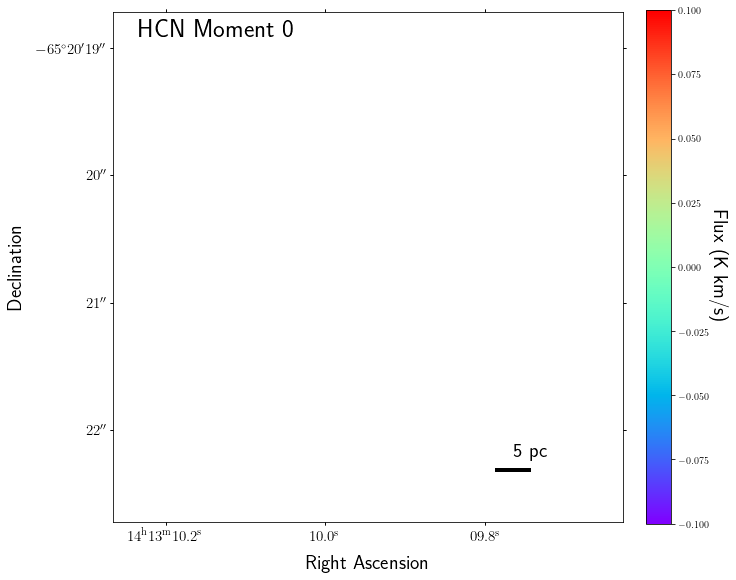

In [67]:
moment_0_HCN_masked = moment_0_HCN.hdu.data
print(np.nanmax(moment_0_HCN.hdu.data))
print(np.nanmin(moment_0_HCN.hdu.data))
badvalsHCN = pylab.where(max_map_HCN <20)
moment_0_HCN_masked[badvalsHCN] = np.nan

cutoutHCN0 = Cutout2D(moment_0_HCN_masked, (center_y,center_x), (200, 200), wcs=wH)
figHCN0 = pylab.figure(1,figsize=(10,10))
axHCN0 = pylab.subplot(projection=cutoutHCN0.wcs)
lonHCN0 = axHCN0.coords[0]
latHCN0 = axHCN0.coords[1]
imHCN0 = pylab.imshow(cutoutHCN0.data,cmap='rainbow')
pylab.xlabel('Right Ascension',fontsize=20)
pylab.ylabel('Declination',fontsize=20)
axHCN0.tick_params(axis = 'both', which = 'major', labelsize = 15)
cbHCN0=pylab.colorbar(imHCN0,fraction=0.046,pad=0.04)                                      
cbHCN0.set_label(label='Flux (K km/s)',fontsize=20,rotation=270,labelpad=20) 
cbHCN0.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='HCN Moment 0',fontsize=25,xy=(0.05,0.95),xycoords="axes fraction")
length = 5/4.2e6*206265/(cheaderC['CDELT2']*3600)
pylab.plot((150,150+length),(20,20),ls='-',lw=4,color='black')
pylab.text(150+length/2, 25, '5 pc',fontsize=20,color='black')
#pylab.savefig("Circinus_Torus_HCN_Moment_0.pdf")

Text(156.1388392857138, 25, '5 pc')

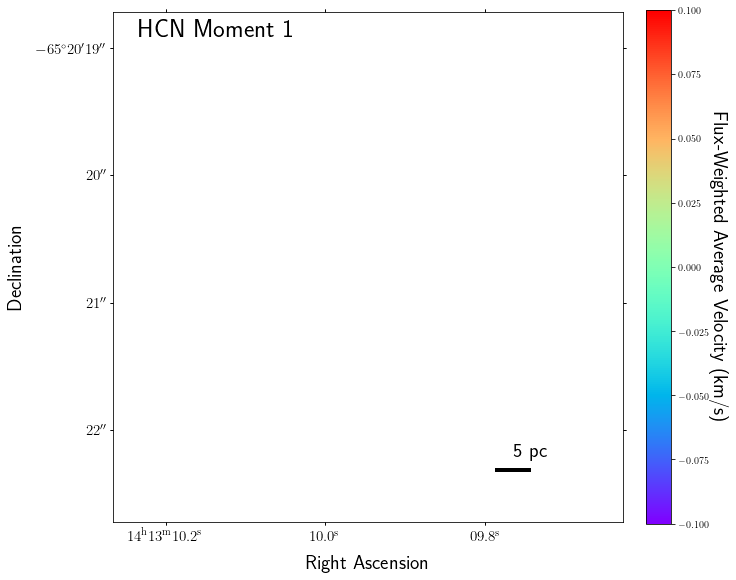

In [68]:
moment_1_HCN_masked = moment_1_HCN.hdu.data
moment_1_HCN_masked[badvalsHCN] = np.nan

cutoutHCN1 = Cutout2D(moment_1_HCN_masked, (center_y,center_x), (200, 200), wcs=wH)
figHCN1 = pylab.figure(1,figsize=(10,10))
axHCN1 = pylab.subplot(projection=cutoutHCN1.wcs)
lonHCN1 = axHCN1.coords[0]
latHCN1 = axHCN1.coords[1]
imHCN1 = pylab.imshow(cutoutHCN1.data,cmap='rainbow')
pylab.xlabel('Right Ascension',fontsize=20)
pylab.ylabel('Declination',fontsize=20)
axHCN1.tick_params(axis = 'both', which = 'major', labelsize = 15)
cbHCN1=pylab.colorbar(imHCN1,fraction=0.046,pad=0.04)                                      
cbHCN1.set_label(label='Flux-Weighted Average Velocity (km/s)',fontsize=20,rotation=270,labelpad=20) 
cbHCN1.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate(s='HCN Moment 1',fontsize=25,xy=(0.05,0.95),xycoords="axes fraction")
length = 5/4.2e6*206265/(cheaderC['CDELT2']*3600)
pylab.plot((150,150+length),(20,20),ls='-',lw=4,color='black')
pylab.text(150+length/2, 25, '5 pc',fontsize=20,color='black')
#pylab.savefig("Circinus_Torus_HCN_Moment_1.pdf")

In [ ]:
#TO DO:
#CLEAN UP MOMENT MAPS (KURT PLANNED TO WORK ON THIS)
#FIND COORDINATES FOR OTHER POSITIONS FOR SPECTRA (E.G. SOUTH TORUS, NORTH TORUS, BRIGHT CO SPOT, ETC.) (ALL)
    (520,480) (475,480) (460,525)